In [10]:
options(warn=-1)

# Proyecto Final 
- Author: Lizette G. (GitHub: LizzyGamboa) (mail: lizzygamboap@gmail.com)
- Author: Yusuri A. (GitHub: YusuriAR) (mail: yusuri.ar@gmail.com)
- Author: Iván S. (GitHub: IvanSalgadoVel) (mail: ivan.salgadovel@gmail.com)
- Creation date: 19 July 2020

## Análisis exploratorio

Se analizan los datos  de peliculas para una empresa de alquiler, la cual quiere saber información general de su almacén y cuál es el comportamiento de sus clientes respecto a su oferta de películas. El cliente ha compartido una base de datos que contiene información de las siguientes variables.

La base con la que trabajaremos tiene por nombre "movies", en estos datos encontramos información de películas desde el año 1986 hasta 2016, la base cuenta con 6820 observaciones y con 15 variables que se describen a continuación:

* **budget**: Presupuesto de la película.

$\quad$Mínimo:0, máximo:300,000,000, media: 24,581,129.
* **company**: Compañia que hizo la película.

$\quad$Variable categórica con 2179 compañías, entre las compañías con más películas se encuentran Universal Pictures con 302, Warner Bros con 294 y Paramount Pictures con 259.

* **country**: País de origen de la película.

$\quad$Variable categórica con 57 distintos países, los países con más película son Estados Unidos con 4872, Reino Unido con 698 y Francia con 283.

* **director**: Director de la película.

$\quad$Variable categórica con 2759 distintis directores, los directores con mas películas son Woody Allen con 33, Clint Eastwood con 24 y Steven Soderbergh con 21.

* **genre**: Género de la película.

$\quad$Variable categórica con 17 distintos géneros, los géneros con más películas son comedia con 2080, drama con 1444 y acción con 1331.

* **gross**: Ganancia bruta de la película.

$\quad$Mínimo:70, máximo:936,662,225, media: 33,497,829.

* **name**: Nombre de la película.

* **rating**: Clasificación de la película.

$\quad$Variable categórica con 13 categorías distintas, las clasificacines con más películas son R con 3392, PG-13 con 1995 y PG con 951.

* **released**: Fecha de lanzamiento de la película.

* **runtime**: Duración de la película en minutos.

$\quad$Mínimo:50, máximo:366, media: 106.6.

* **score**: Puntuación de la película.

$\quad$Mínimo:1.5, máximo:9.3, media: 6.375.
* **star**: Actor/actriz principal de la película.

* **votes**: Votos para la puntuación de la película.

$\quad$Mínimo:27, máximo:1861666, media: 71220.
* **writer**: Escritor del guión de la película.

* **year**: Año de estreno de la película.

$\quad$Se usará como variable categórica con 31 años distintos, los años con más películas son 1989 con 221, 1986 con 220 y 1988 con 220.

In [5]:
library(tidyr)
library(dplyr )
library(ggplot2)
library(GGally)

normalit<-function(m){
   (m - min(m))/(max(m)-min(m))
 }

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



Se obtiene un resumen de toda la base con summary para darnos una idea de qué variables son importantes para nuestro análisis y con el str conocemos el tipo de cada una de éstas:

In [7]:
movies<-read.csv("movies.csv")
summary(movies)

     budget                                            company    
 Min.   :        0   Universal Pictures                    : 302  
 1st Qu.:        0   Warner Bros.                          : 294  
 Median : 11000000   Paramount Pictures                    : 259  
 Mean   : 24581129   Twentieth Century Fox Film Corporation: 205  
 3rd Qu.: 32000000   New Line Cinema                       : 172  
 Max.   :300000000   Columbia Pictures Corporation         : 166  
                     (Other)                               :5422  
      country                  director          genre          gross          
 USA      :4872   Woody Allen      :  33   Comedy   :2080   Min.   :       70  
 UK       : 698   Clint Eastwood   :  24   Drama    :1444   1st Qu.:  1515839  
 France   : 283   Steven Soderbergh:  21   Action   :1331   Median : 12135679  
 Canada   : 150   Steven Spielberg :  21   Crime    : 522   Mean   : 33497829  
 Germany  : 134   Ron Howard       :  20   Adventure: 392   3rd 

In [8]:
str(movies)

'data.frame':	6820 obs. of  15 variables:
 $ budget  : num  8000000 6000000 15000000 18500000 9000000 6000000 25000000 6000000 9000000 15000000 ...
 $ company : Factor w/ 2179 levels "\"DIA\" Productions GmbH & Co. KG",..: 665 1683 1683 2068 2124 1159 1161 763 1683 1936 ...
 $ country : Factor w/ 57 levels "Argentina","Aruba",..: 56 56 56 56 56 54 54 56 56 56 ...
 $ director: Factor w/ 2759 levels "\xc1lex de la Iglesia",..: 2200 1305 2652 1074 2131 1955 1215 594 1011 563 ...
 $ genre   : Factor w/ 17 levels "Action","Adventure",..: 2 5 1 1 2 7 2 7 5 7 ...
 $ gross   : num  5.23e+07 7.01e+07 1.80e+08 8.52e+07 1.86e+07 ...
 $ name    : Factor w/ 6731 levels "'71","'night, Mother",..: 4671 1829 6211 299 1880 3911 2892 784 3969 5313 ...
 $ rating  : Factor w/ 13 levels "B","B15","G",..: 9 8 7 9 7 9 7 9 8 9 ...
 $ released: Factor w/ 2403 levels "1986-01-10","1986-01-17",..: 40 28 24 34 37 76 31 52 10 39 ...
 $ runtime : int  89 103 110 137 90 120 101 120 96 96 ...
 $ score   : num  8.1 7.

### ¿Cuántas peliculas se tienen en total por género?

In [11]:
movies  %>% group_by(genre) %>% summarise(peliculas=n() ) %>% arrange (peliculas)

`summarise()` ungrouping output (override with `.groups` argument)



genre,peliculas
<fct>,<int>
War,2
Western,2
Musical,4
Sci-Fi,13
Family,14
Romance,15
Thriller,18
Fantasy,32
Mystery,38


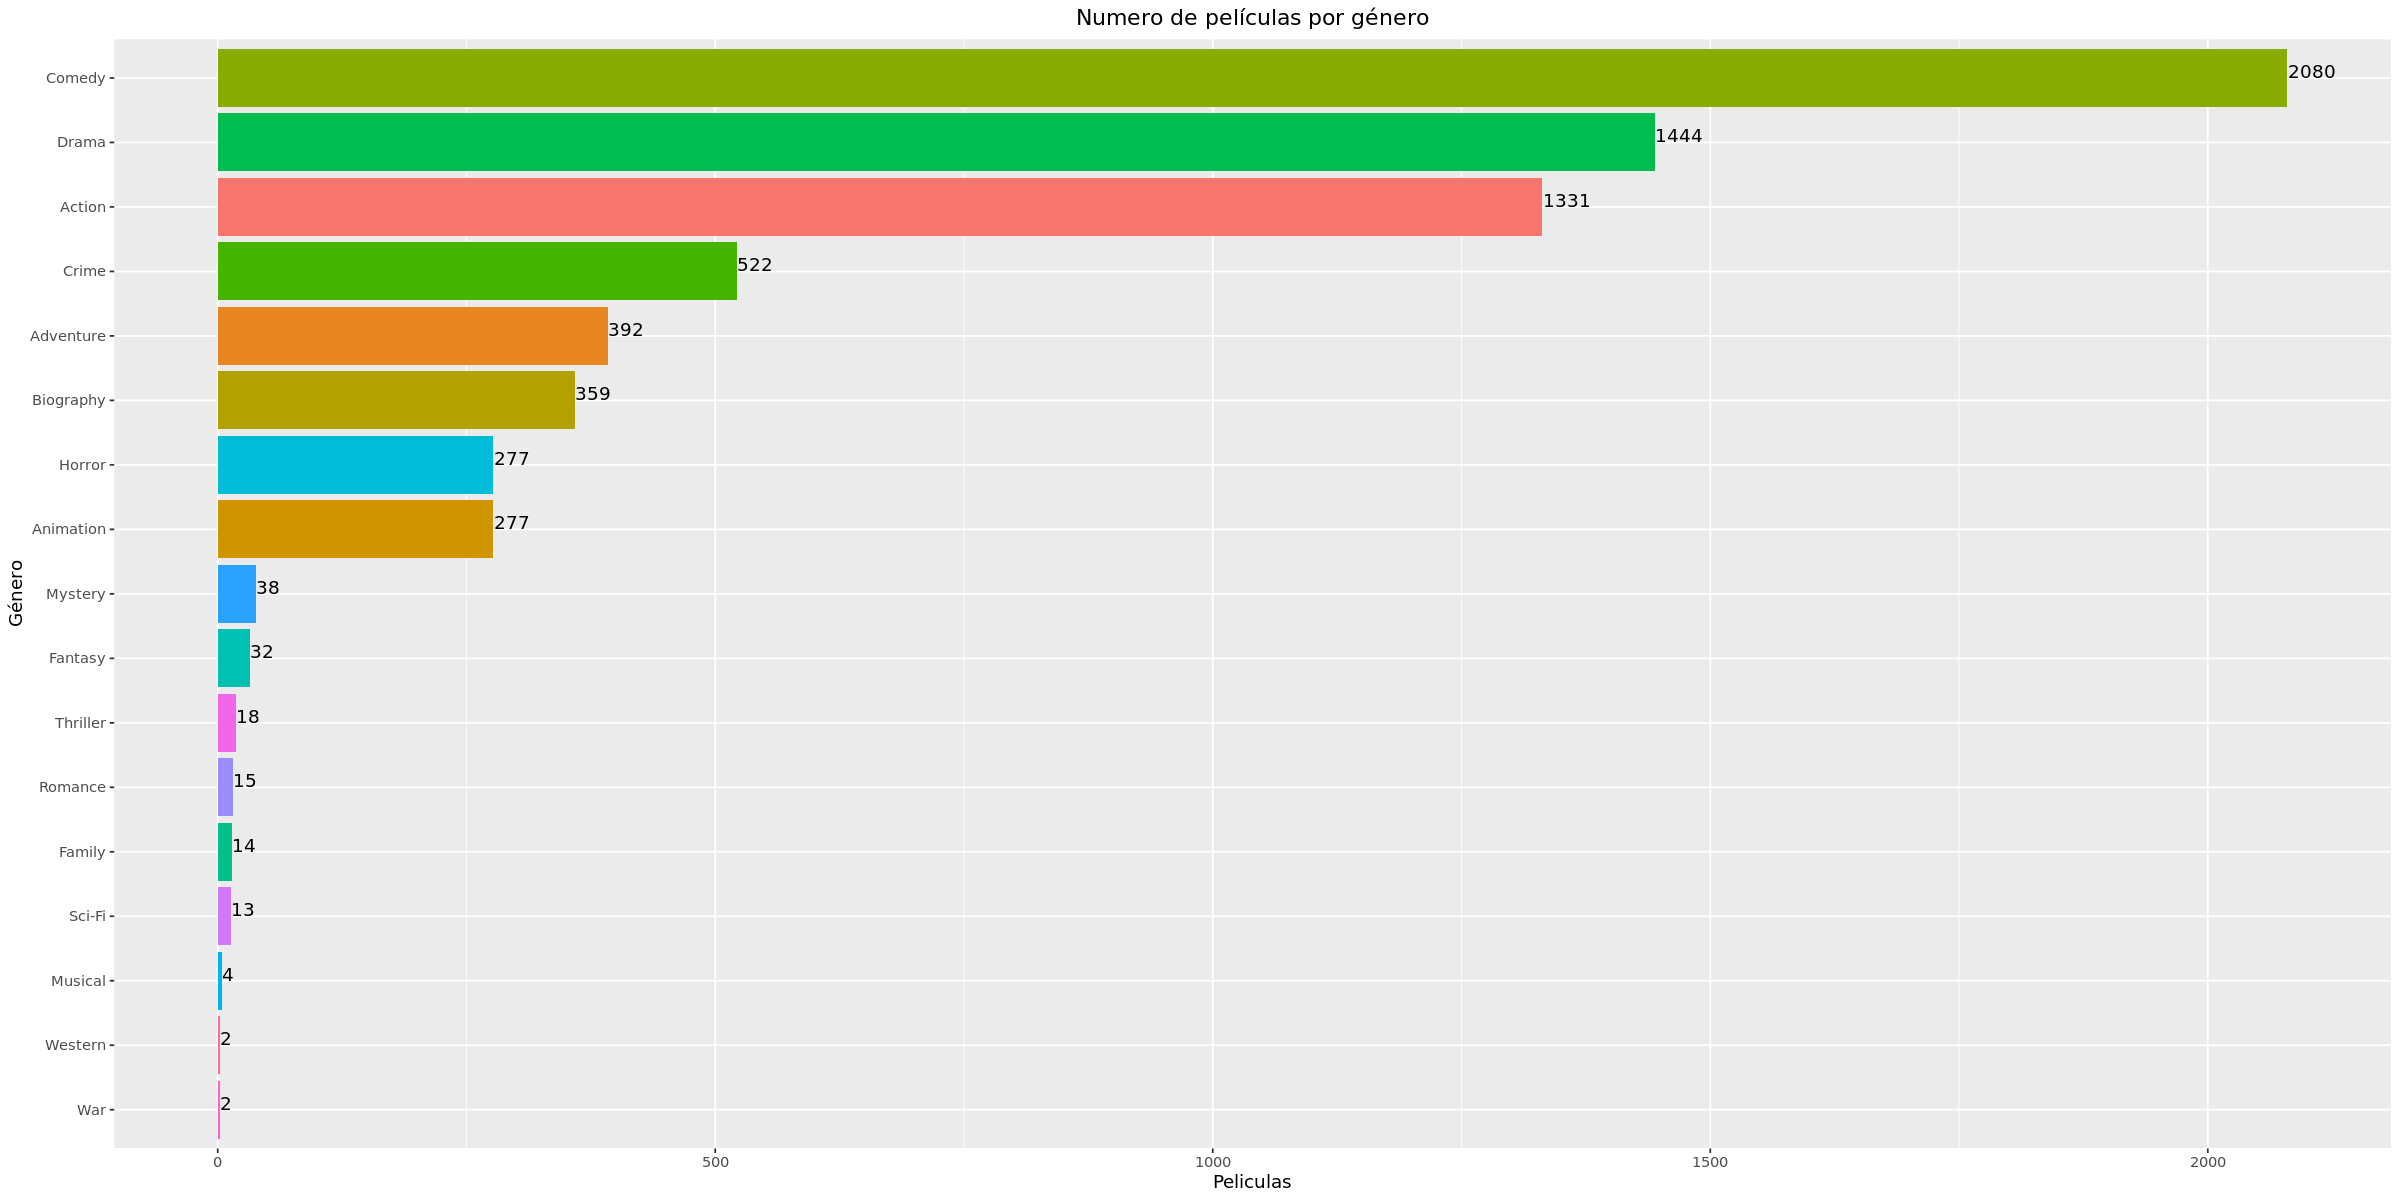

In [50]:
options(repr.plot.width=20, repr.plot.height=10)

table(movies$genre)  %>%  as.data.frame() %>% arrange(Freq)  %>% 
  ggplot(aes(x=reorder(Var1,Freq), y=Freq , fill=as.factor(Var1)) )  +
        geom_bar(stat="identity") +
        ggtitle("Numero de películas por género")+
        coord_flip() +
        geom_text(aes( label=Freq, hjust=-.01, vjust=0)) + 
        xlab("Género") + 
        ylab("Peliculas") +
        theme(legend.position="none", plot.title = element_text(hjust = 0.5)) 

Con esta gráfica podemos confirmar que los géneros con más películas son comedia, drama y acción, ademas podemos ver que hay géneros que tienen muy pocas películas como guerra, musicales y wéstern.

Si quisieramos concentrarnos en las categorías con los mayores números de películas, podemos agrupar el resto para mirar de una mejor manera la distribución: 

In [14]:
t1 <-movies  %>% group_by(genre) %>% summarise(peliculas=n() ) %>% arrange (peliculas)  %>% 
    mutate ( genre1= if_else(peliculas<50, "Otros", as.character(genre)))  %>%
    group_by( genre1)  %>% summarise(peliculas1=sum(peliculas) ) %>% as_tibble() %>%
    mutate(porcentaje= round(peliculas1/sum(peliculas1),2) )
t1

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



genre1,peliculas1,porcentaje
<chr>,<int>,<dbl>
Action,1331,0.20
Adventure,392,0.06
Animation,277,0.04
Biography,359,0.05
Comedy,2080,0.30
Crime,522,0.08
Drama,1444,0.21
Horror,277,0.04
Otros,138,0.02


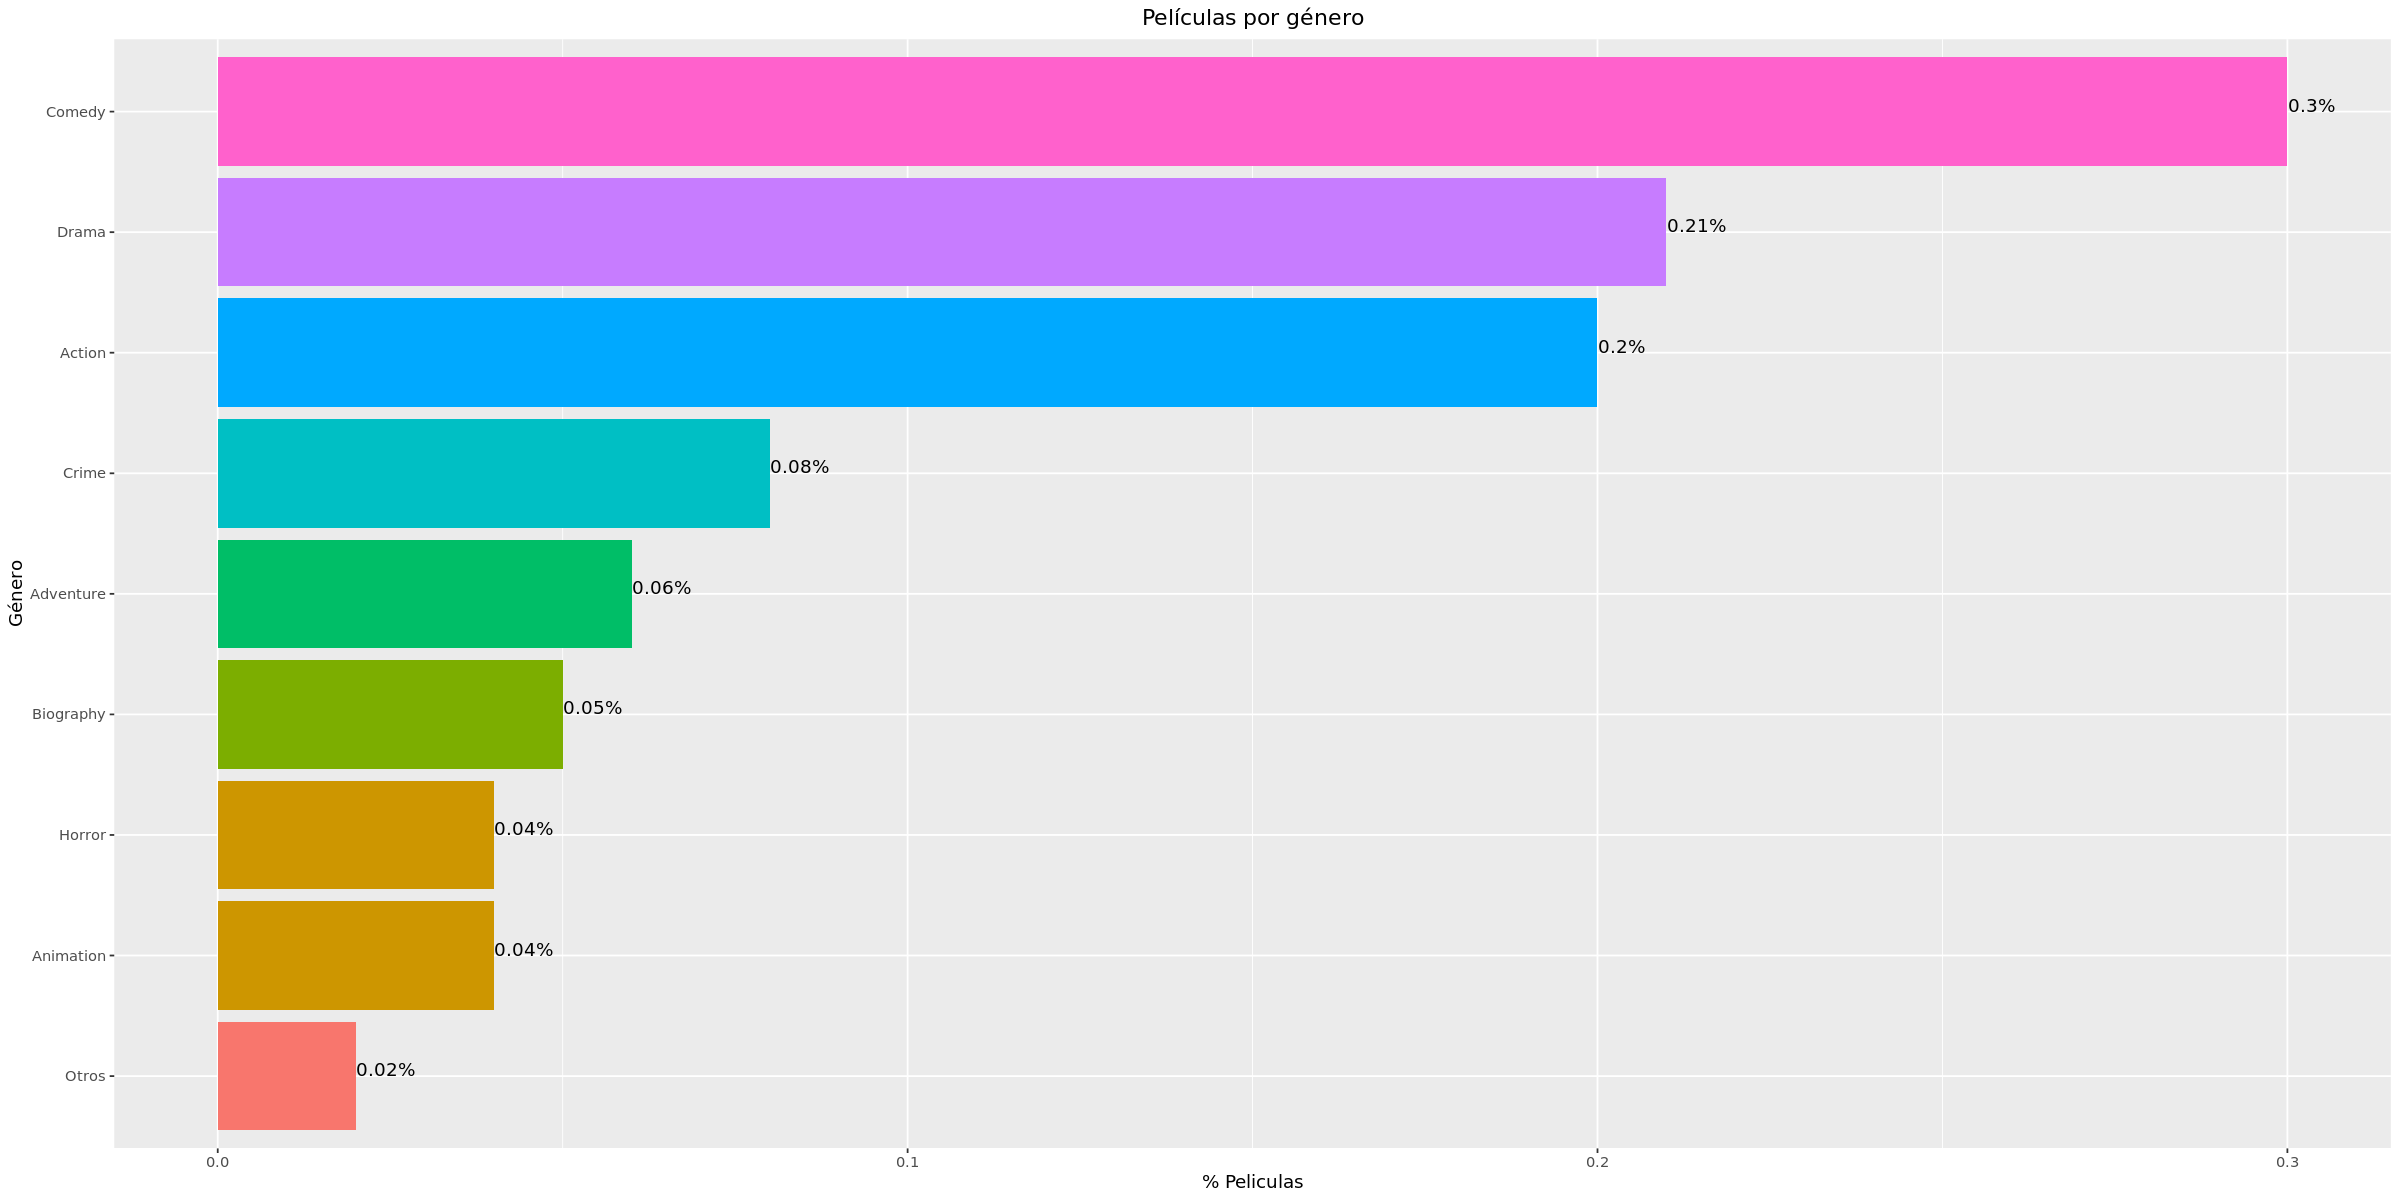

In [49]:
options(repr.plot.width=20, repr.plot.height=10)
t1  %>%  
    ggplot(aes(x=reorder(genre1,porcentaje), y=porcentaje , fill=as.factor(peliculas1)) )  +
        geom_bar(stat="identity") +
        ggtitle("Películas por género")+
        coord_flip() +
        geom_text(aes( label=paste0(porcentaje, "%"), hjust=-.01, vjust=0)) + 
        xlab("Género") + 
        ylab("% Peliculas") +
        theme(legend.position="none", plot.title = element_text(hjust = 0.5)) 

### ¿Cómo se ven las medidas de tendencia central por género?

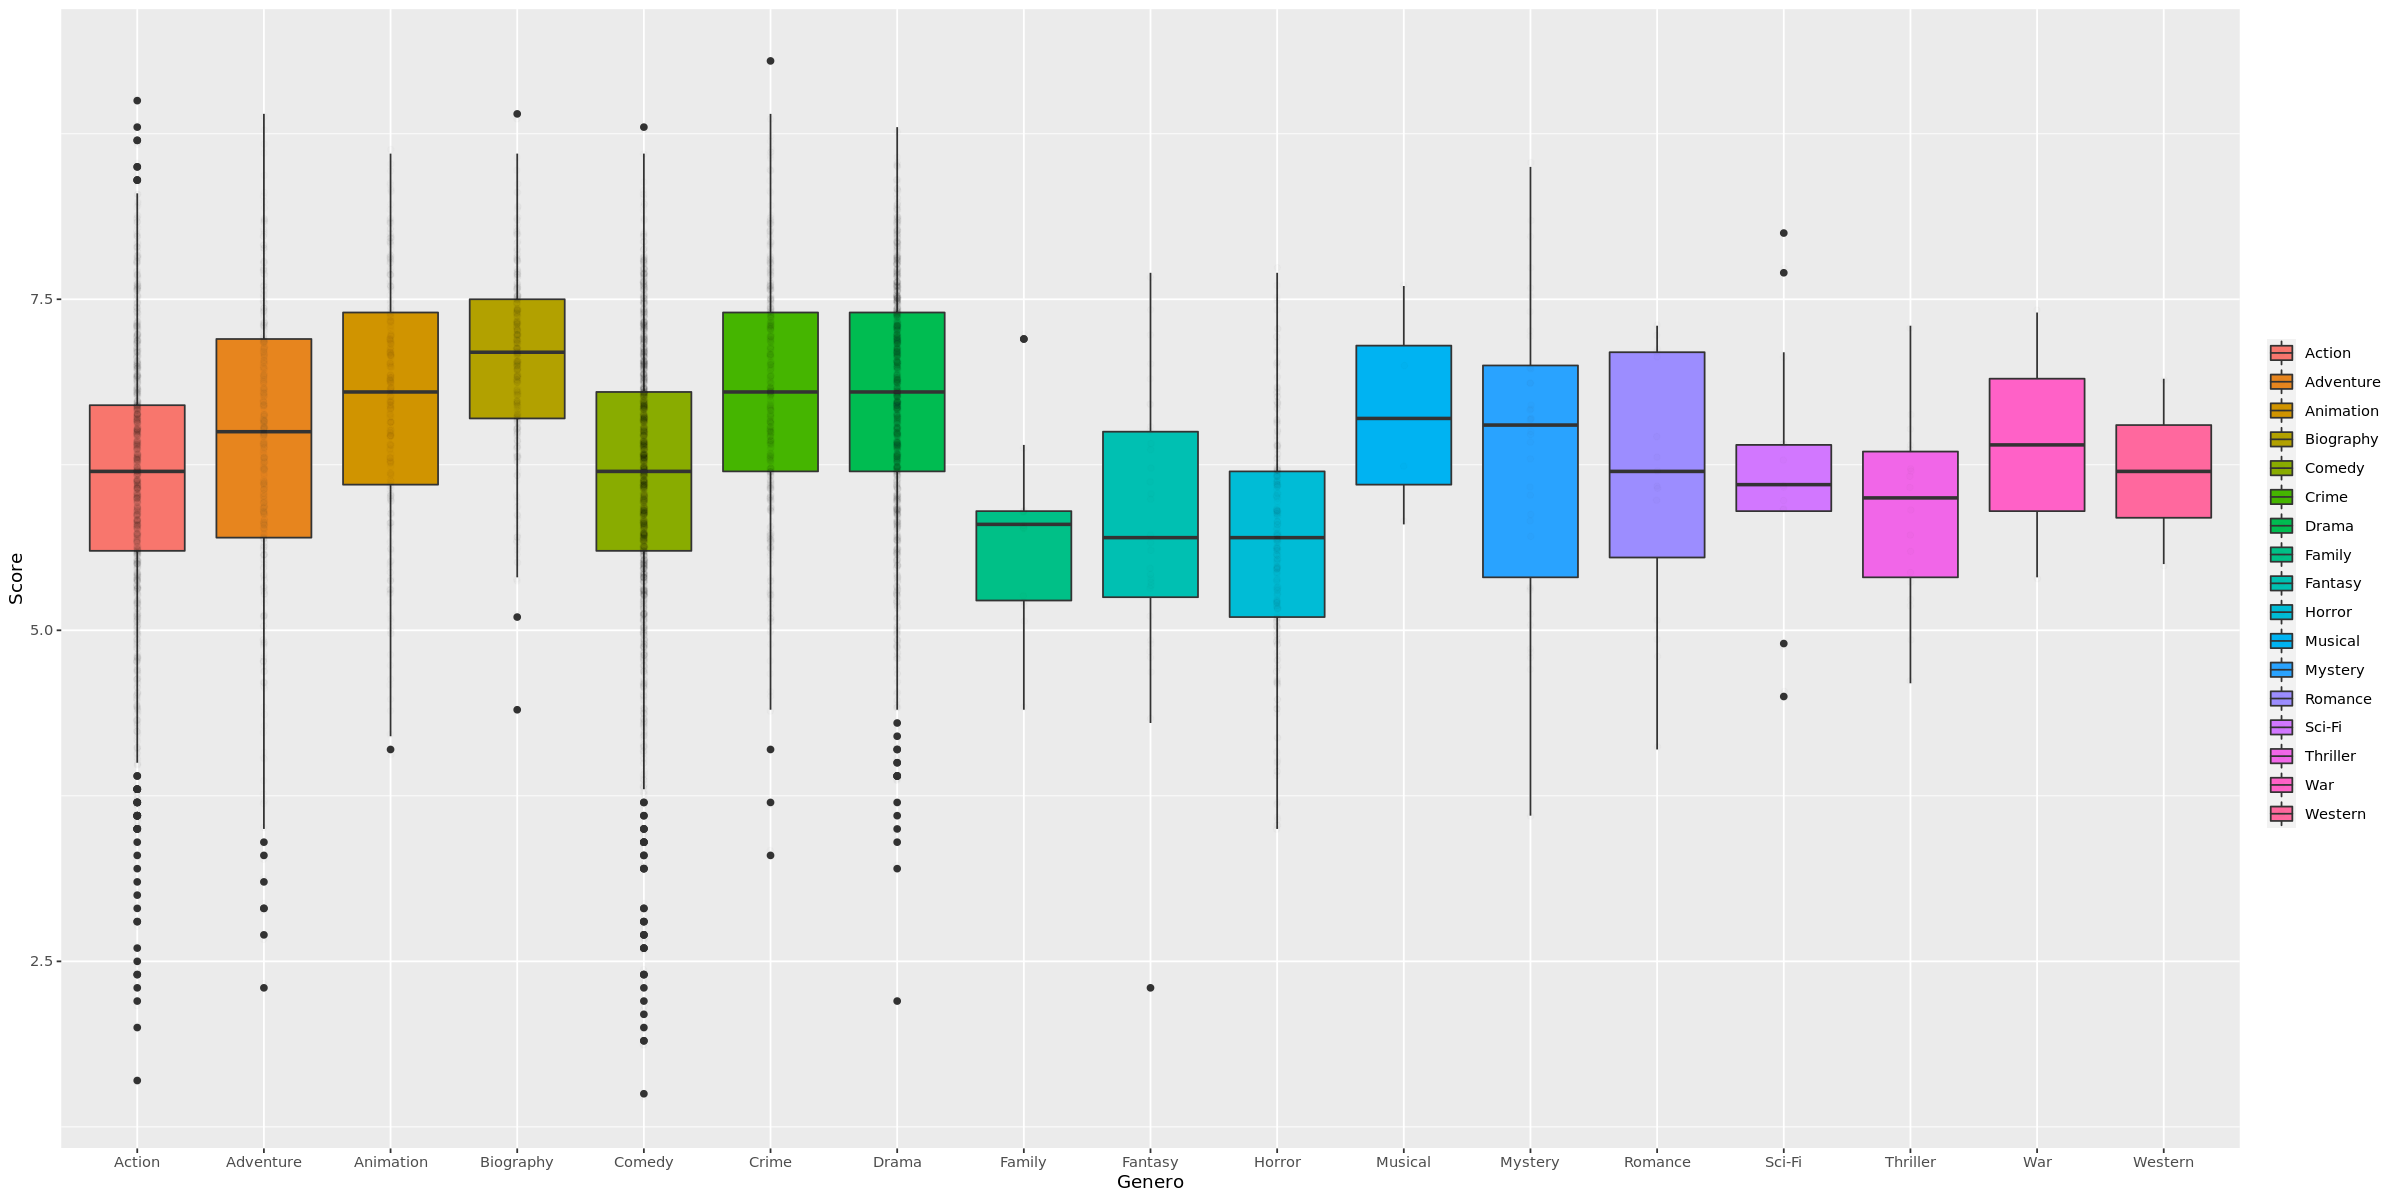

In [51]:
options(repr.plot.width=20, repr.plot.height=10)
# La distribucion de las calificaciones a las peliculas genero? 
movies %>% 
  ggplot(aes(genre,score, fill=as.factor(genre)) )  +
        geom_boxplot() +
        geom_jitter(width=0.005,alpha=0.01)+
        theme(legend.title = element_blank())+
        xlab("Genero") + 
        ylab("Score")

* Podemos decir a nuestro cliente que los géneros que tienen un promedio las mejores calificaciones (score) son los generos de peliculas Biograficas, seguidas de la de Animación. 
* La distribución de los géneros de Acción y Comedia, son los que tienen colas mas pesadas. 
* Los géneros con mayor varianza son Aventura, Misterio y Romance.

### Gráfica con el número de películas por clasificación:

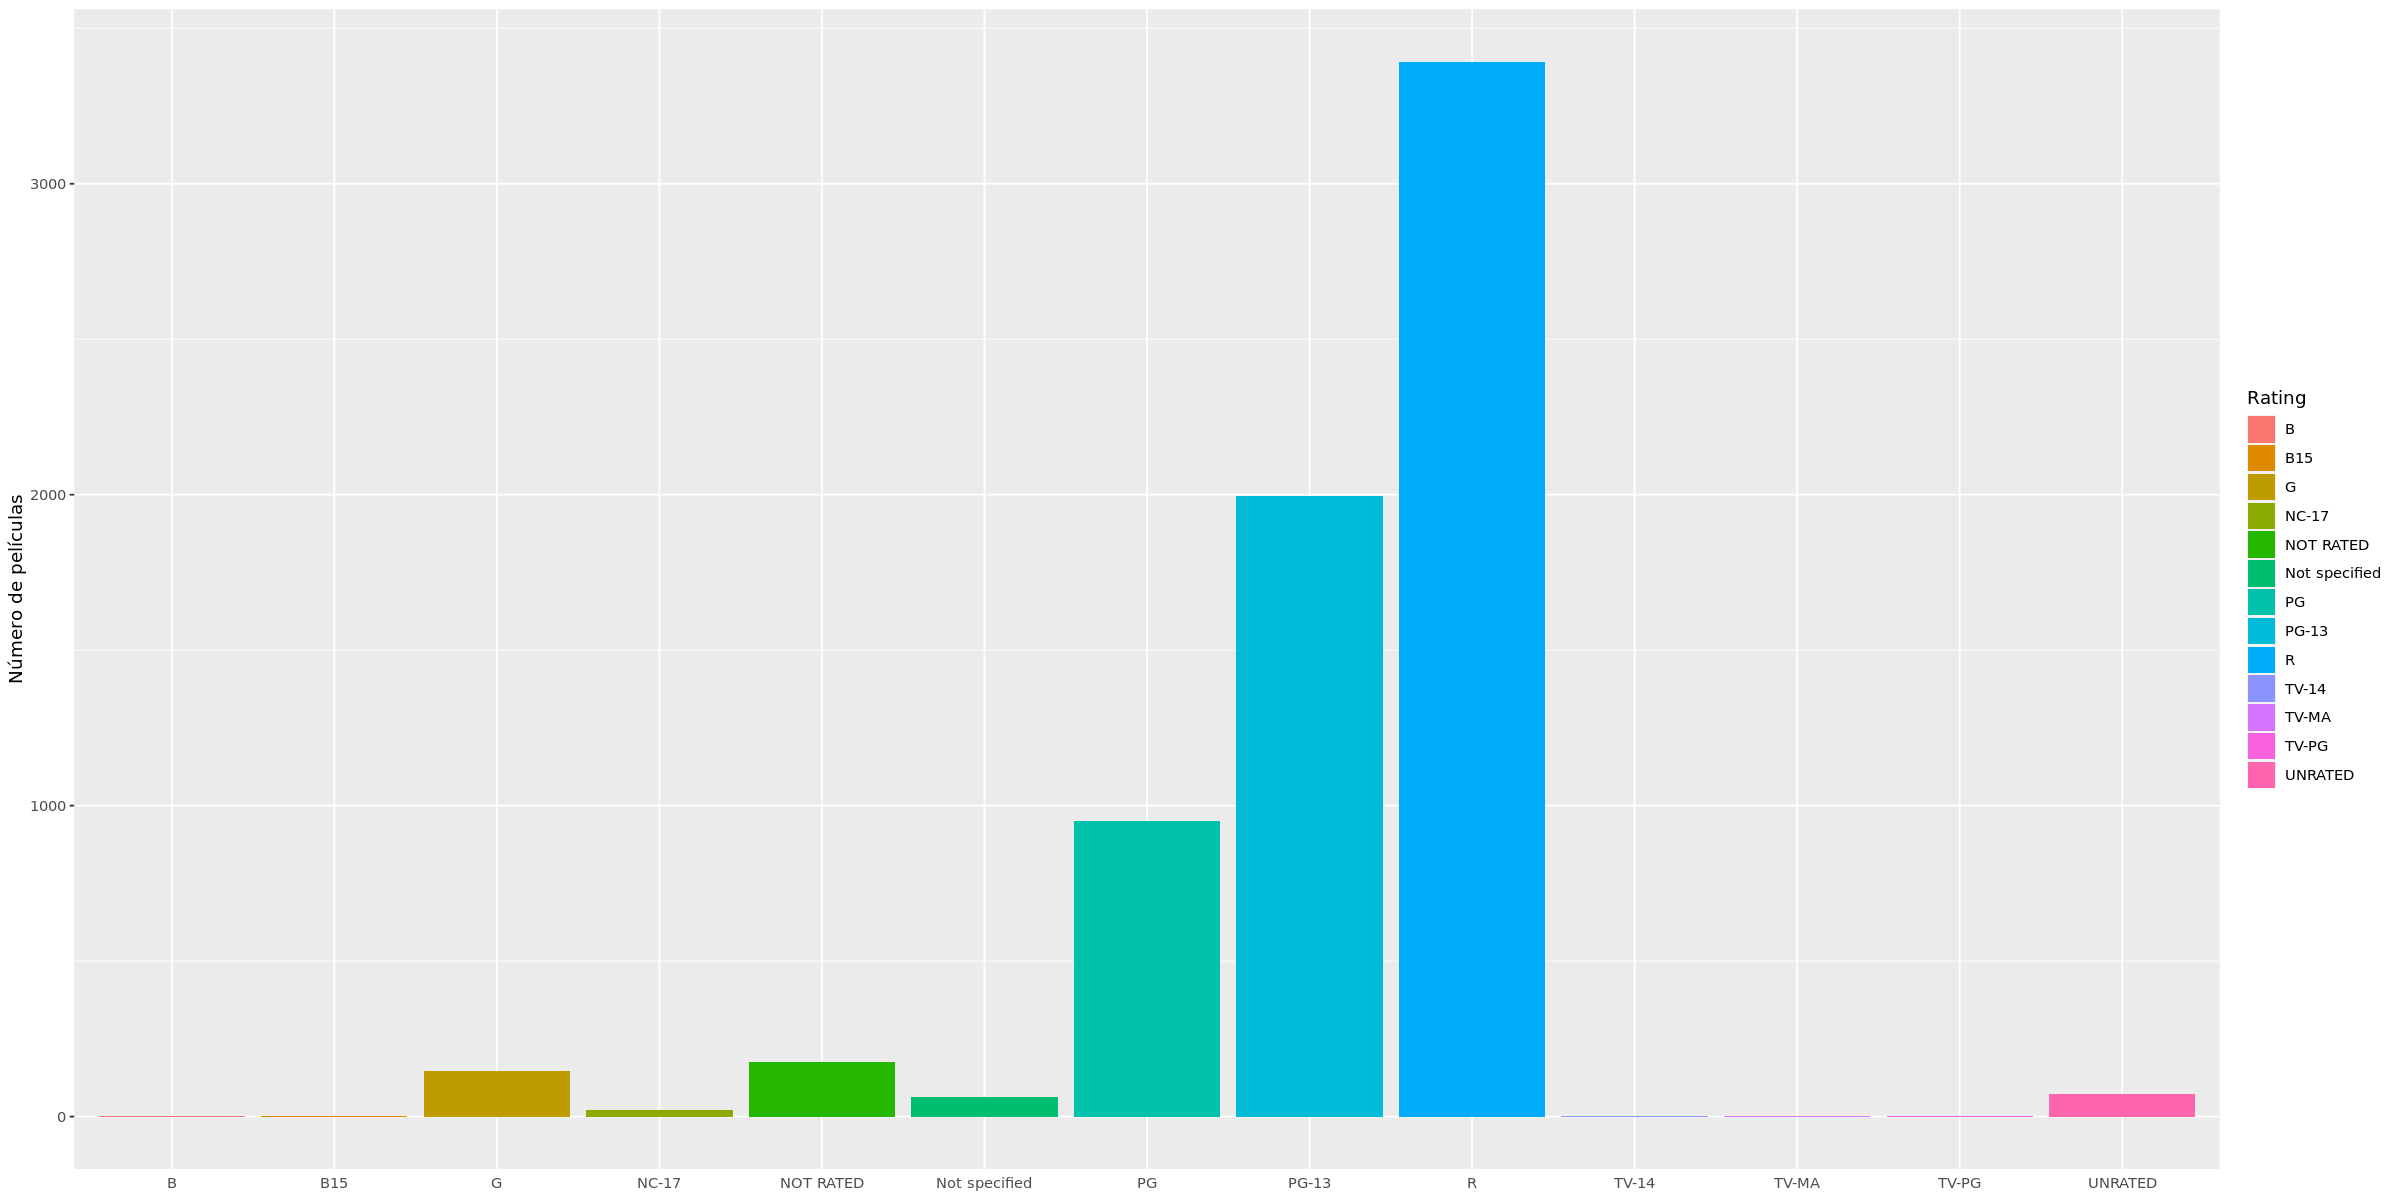

In [52]:
options(repr.plot.width=20, repr.plot.height=10)
ggplot(movies, aes(x=movies$rating, fill=movies$rating )) + 
  geom_bar( ) + scale_y_continuous(name= "Número de películas")+
  theme(axis.title.x = element_blank(),axis.ticks.x = element_blank())+labs(fill="Rating")


### Gráfica con el top 5 de países que producen más películas por clasificación:

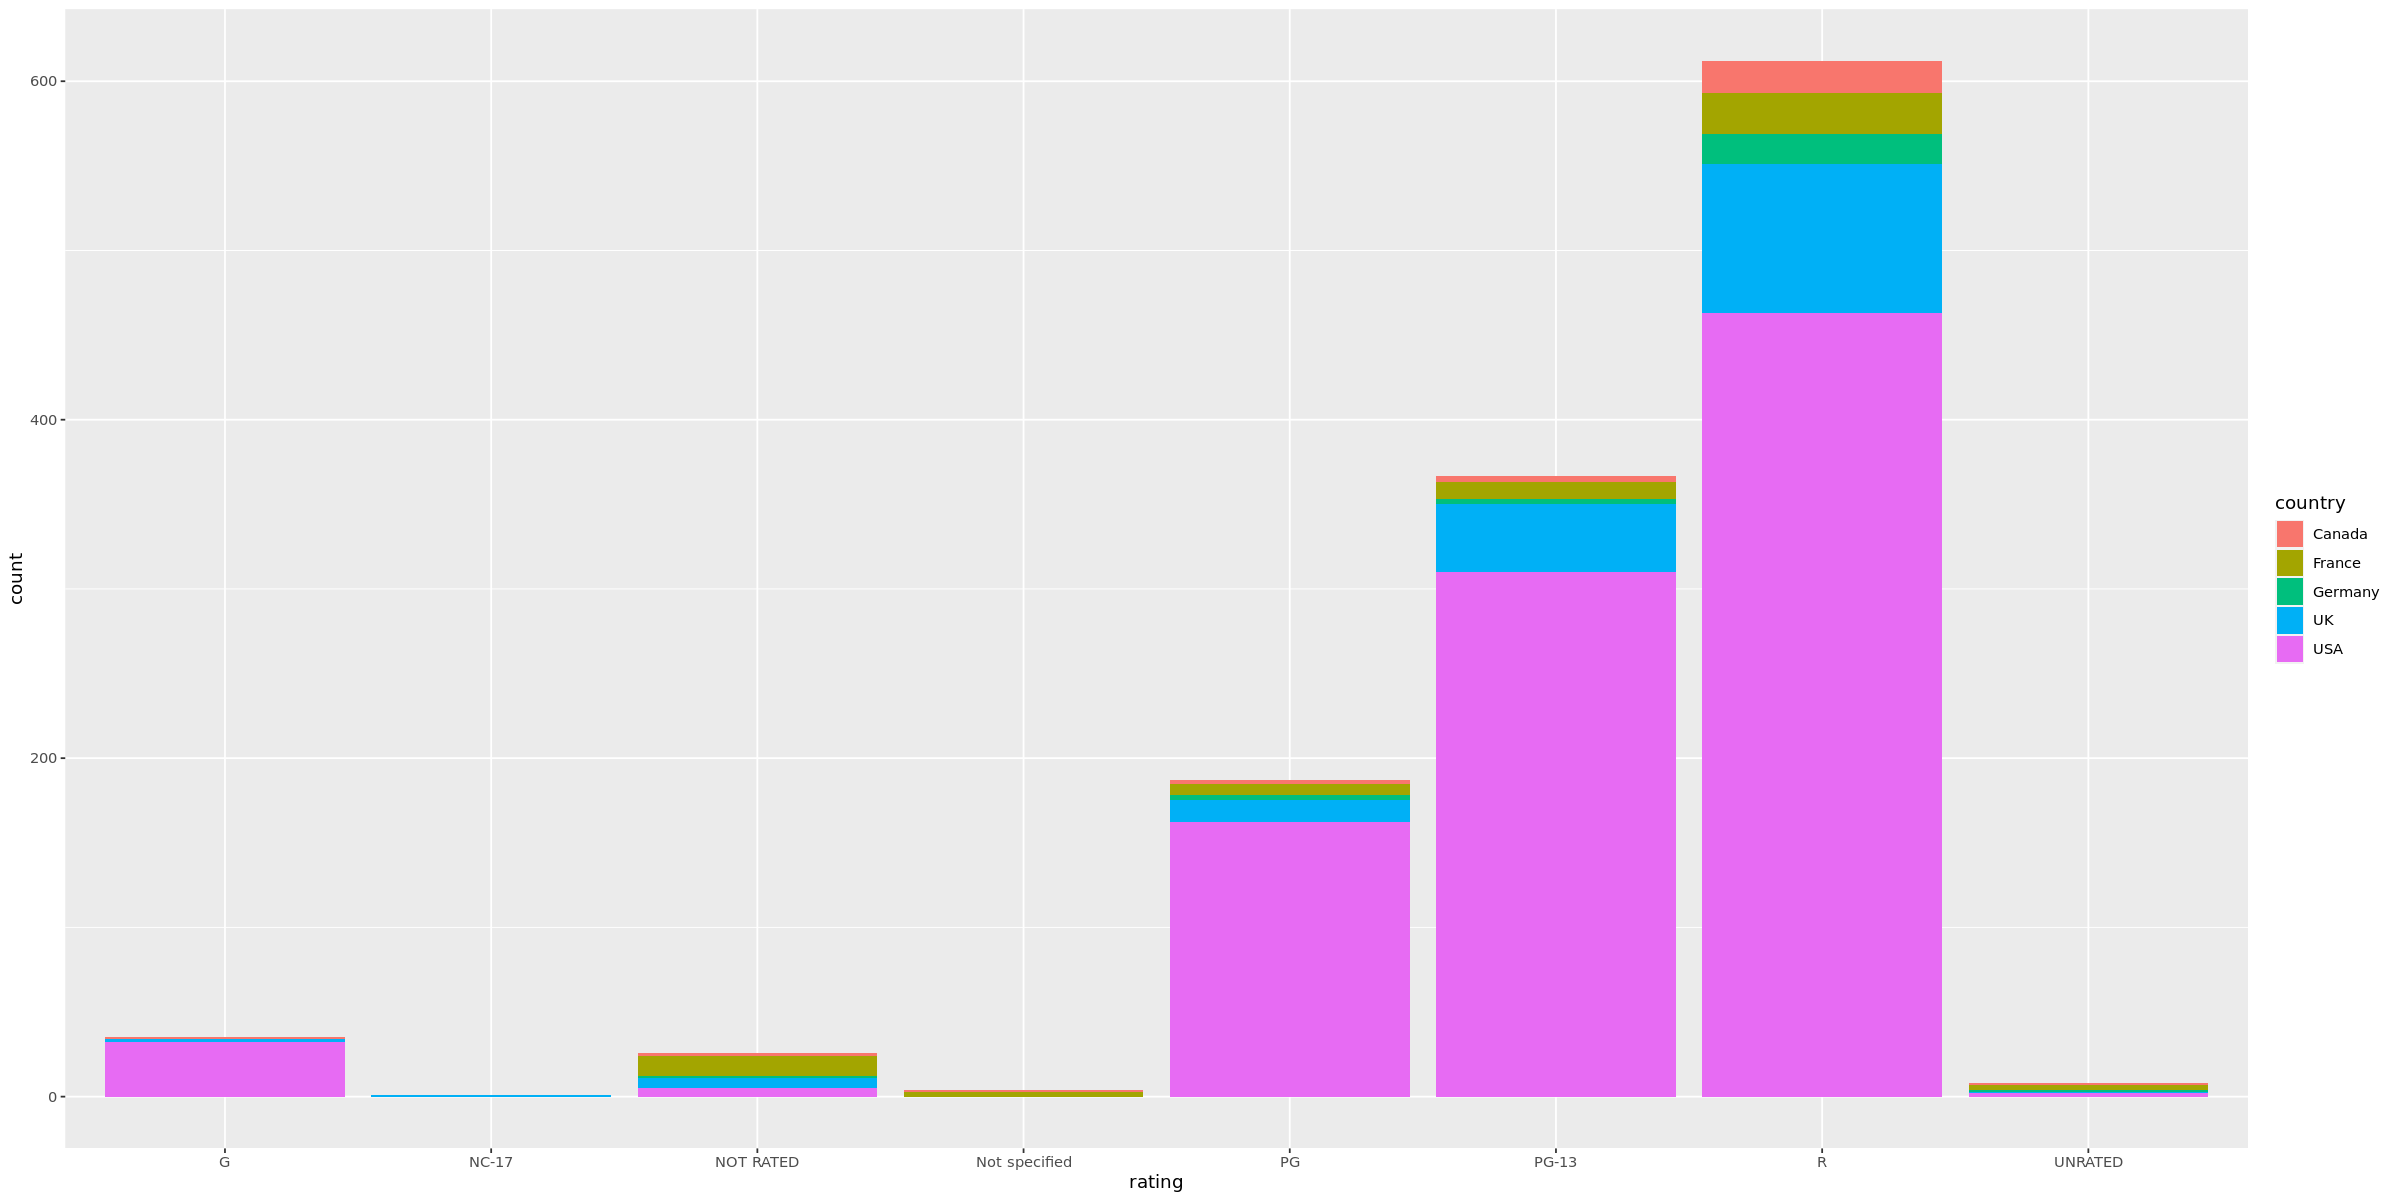

In [53]:
options(repr.plot.width=20, repr.plot.height=10)
index1<-which(movies$country==c('USA','UK','France','Canada','Germany'))
ggplot(data=movies[index1,],aes(x=rating,fill=country))+geom_bar()


Ya habíamos hecho un resumen con la clasificación de las películas pero para entender la magnitud de producción, en ésta gráfica únicamente tomamos el top de los 5 países con mayor producción, pues abarcan un gran porcentaje del total. Con ésto podemos observar que aún comparando a USA contra los países que le preceden en producción tiene un porcentaje muy por encima de la media, especialmente entre las clasificaciones más importantes que son G, PG, PG-13 y R.

### Aceptación a través de los años

En la siguiente línea creamos dos nuevas variables para un análisis más detallado. Éstas son:

-profit: La definimos como la ganancia. Se obtiene al restar el presupuesto (budget) del total recaudado o ganancia neta(gross)

-choice: Define si la película fue del agrado o no del público. Se define como like si la calificación (score) es mayor o igual al promedio y dislike si es menor.

In [27]:
prof<-data.frame(profit=movies$gross-movies$budget,
                        choice=ifelse(movies$score>=mean(movies$score),'like','dislike'))
movies1<-cbind(movies,prof)
attach(movies1)

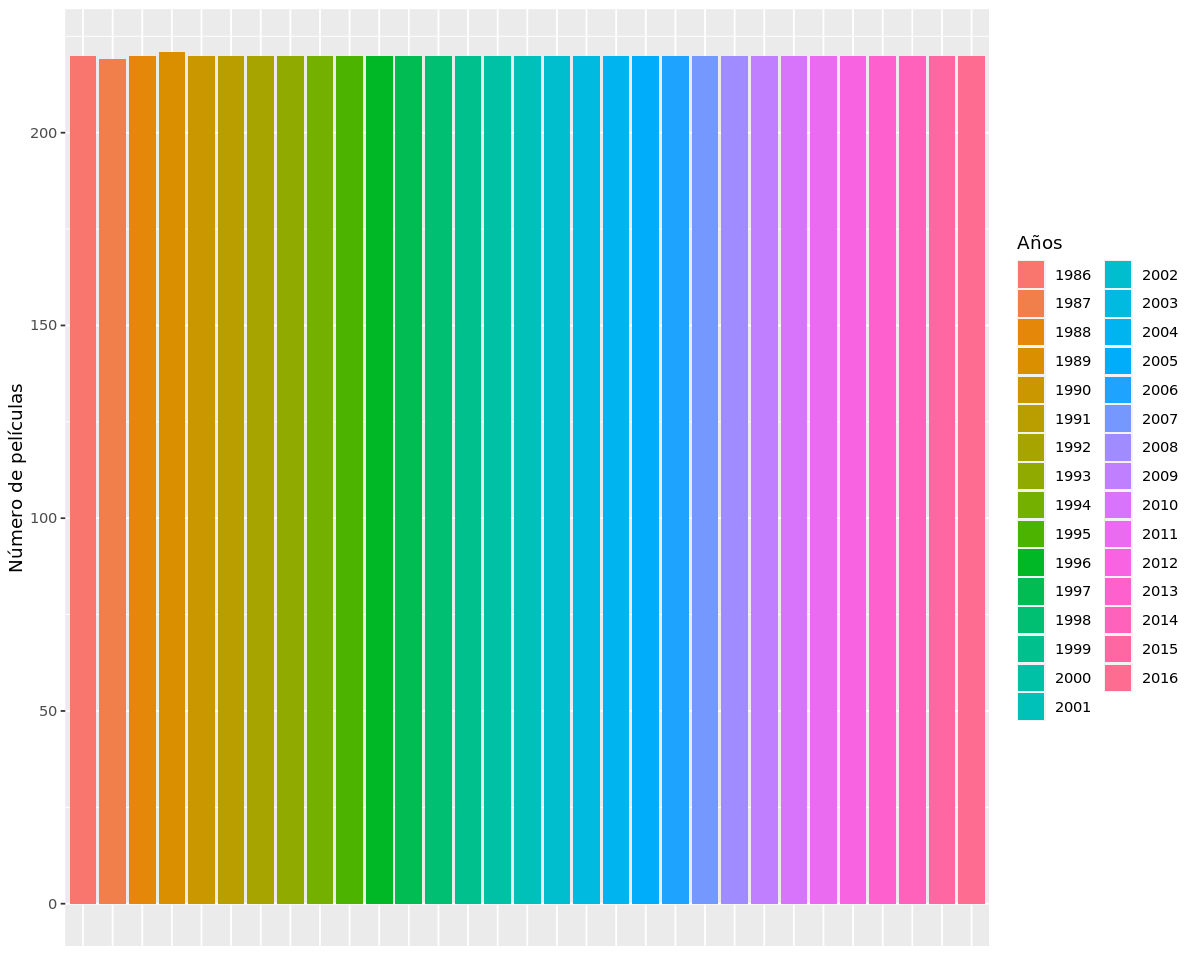

In [56]:
options(repr.plot.width=10, repr.plot.height=8)

movies$year<-as.factor(movies$year)
ggplot(movies, aes(x=movies$year, fill=movies$year )) + 
  geom_bar( ) + scale_y_continuous(name= "Número de películas")+
  theme(axis.title.x = element_blank(),axis.text.x = element_blank(),axis.ticks.x = element_blank())+labs(fill="Años")


La gráfica de los años nos deja ver que hay una cantidad uniforme en casi todos los años, 220 películas por año, a excepción de 1987 con 219 películas y 1989 con 221 películas.

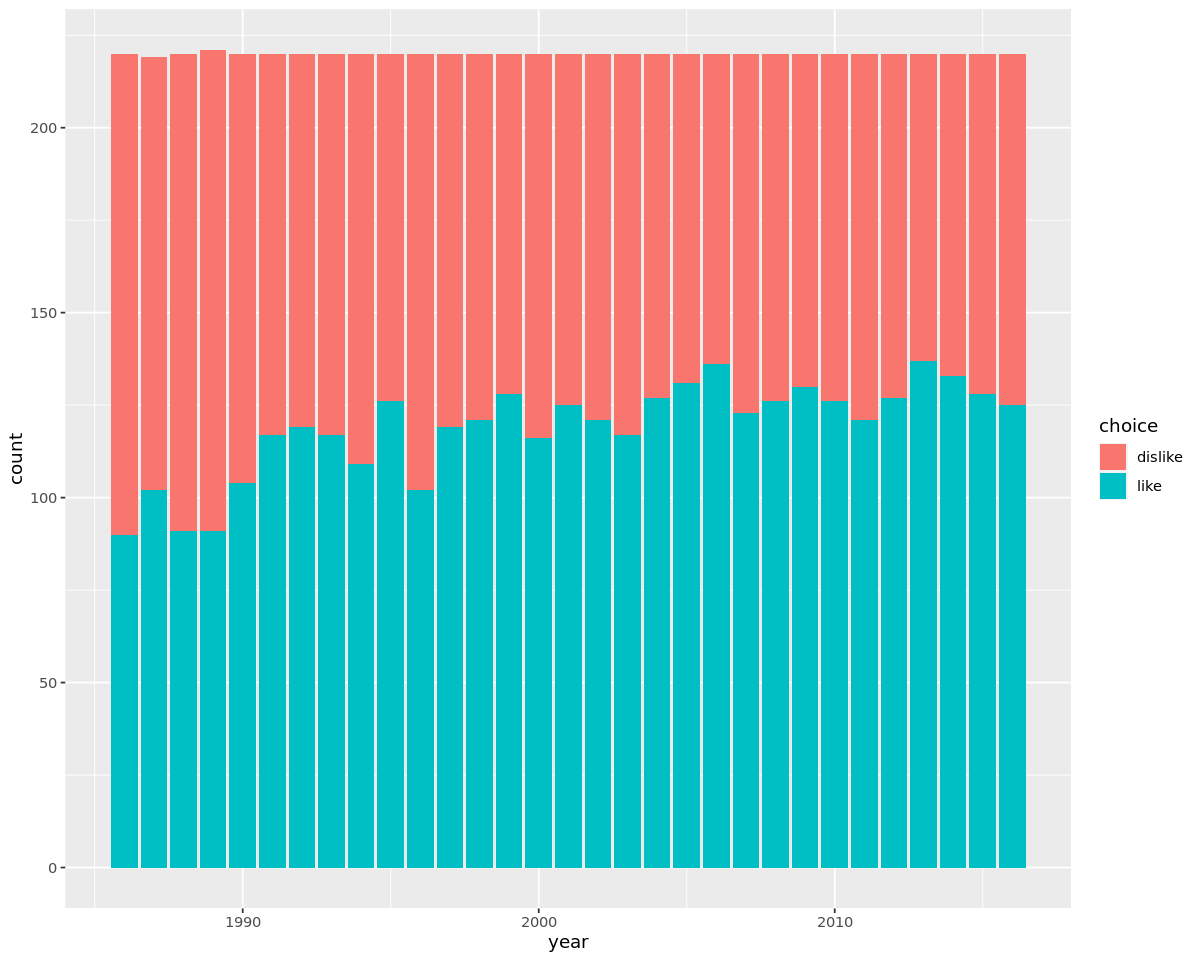

In [57]:
ggplot(data=movies1,aes(x=year,fill=choice))+geom_bar()

En la gráfica previa observamos la producción a través de los años y en ésta se hace una división de esa misma producción pero mostrando la aceptación se ha tenido a través de los años, como podemos ver ha ido en aumento.

Se toman solo las películas con score mayor al promedio y de los principales géneros

In [32]:
index3<-filter(movies,genre %in% c('Comedy','Drama','Action','Crime','Adventure'),choice=='like')

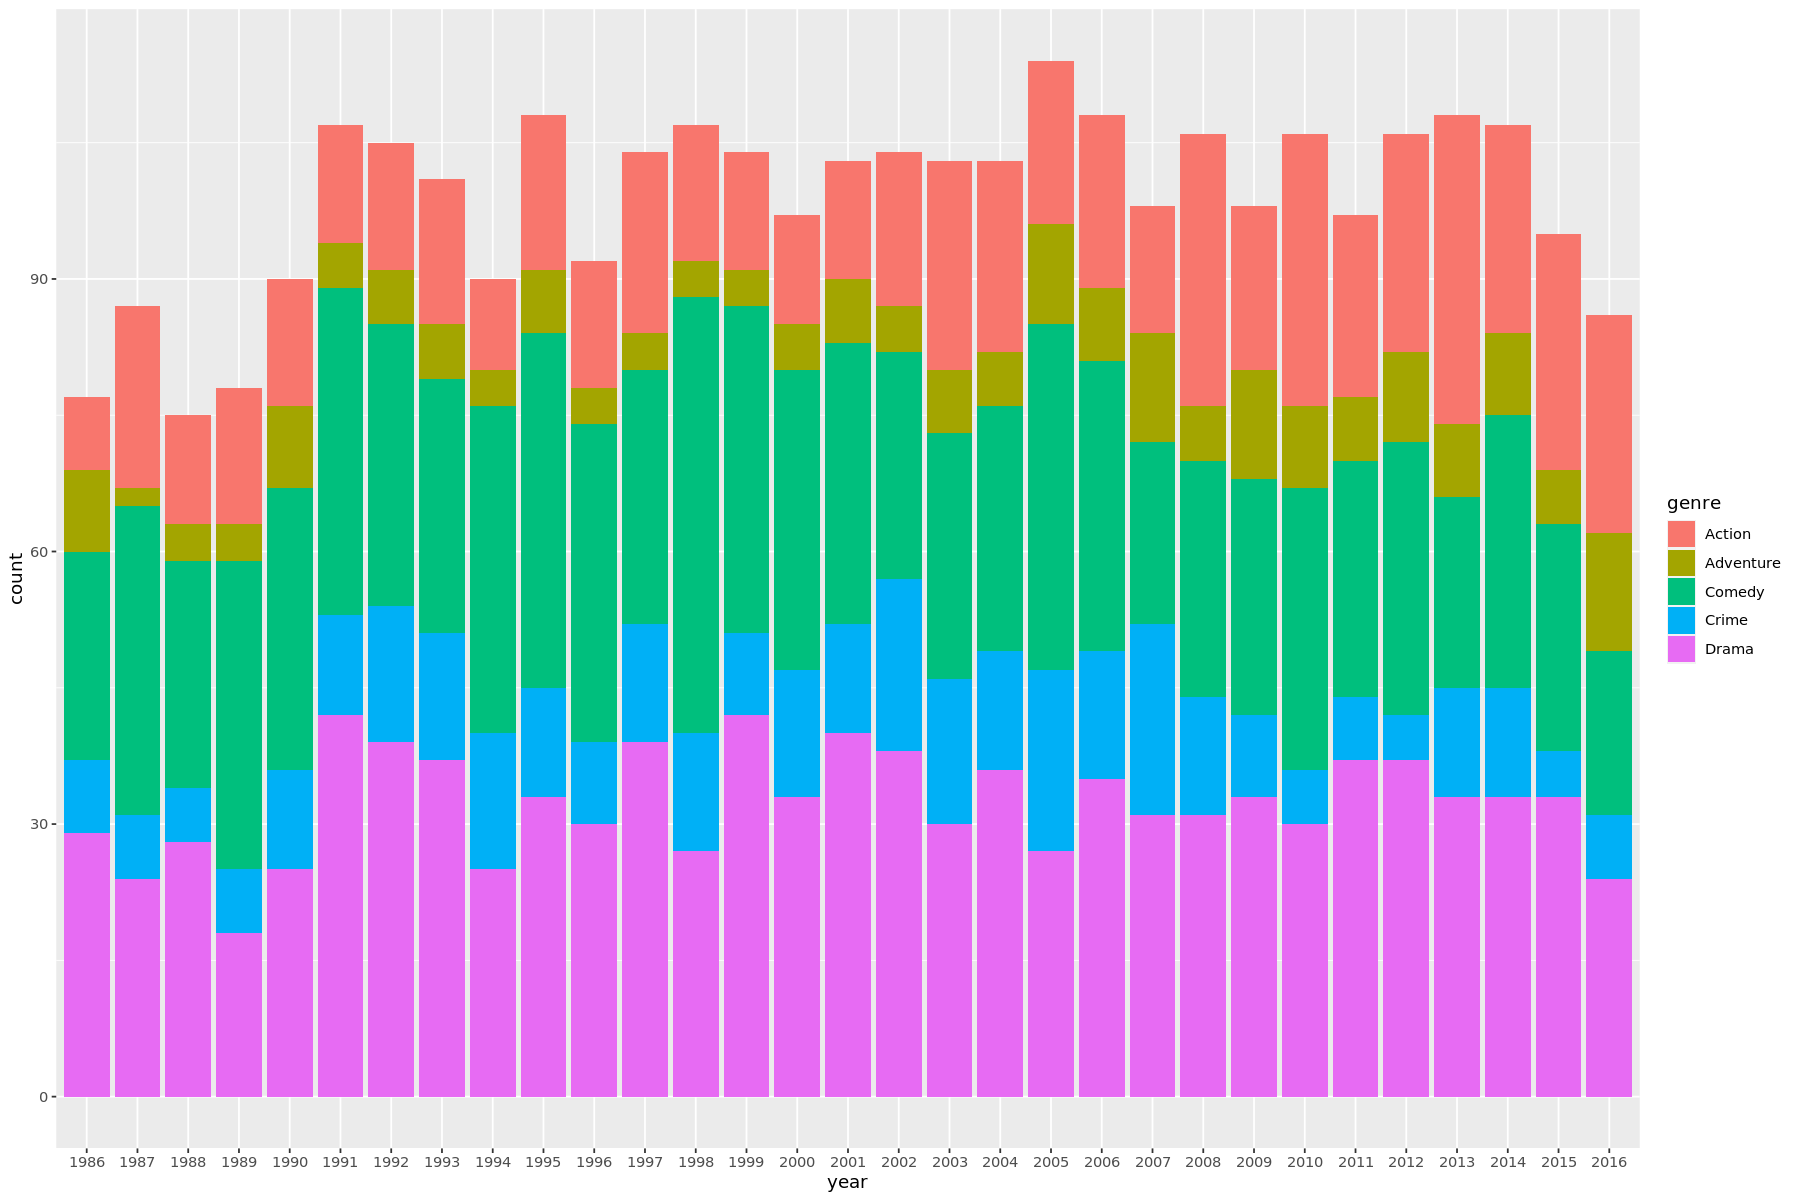

In [34]:
options(repr.plot.width=15, repr.plot.height=10)
ggplot(data=index3,aes(year,fill=genre))+geom_bar()

Al igual que la gráfica anterior podemos ver la aceptación que va incrementando al pasar de los años y aquí podemos ver la segmentación de estas películas que se encuentran por ecima de la media de calificación. Notamos que la aceptación ha sido mayor en el genero de acción en las últimas décadas y es razonable pues al pasar de los años se han ido mejorando los efectos especiales.

En las películas de drama podemos ver que la aceptación en general no ha cambiado mucho al pasar de los años.

### Calificación vs votos

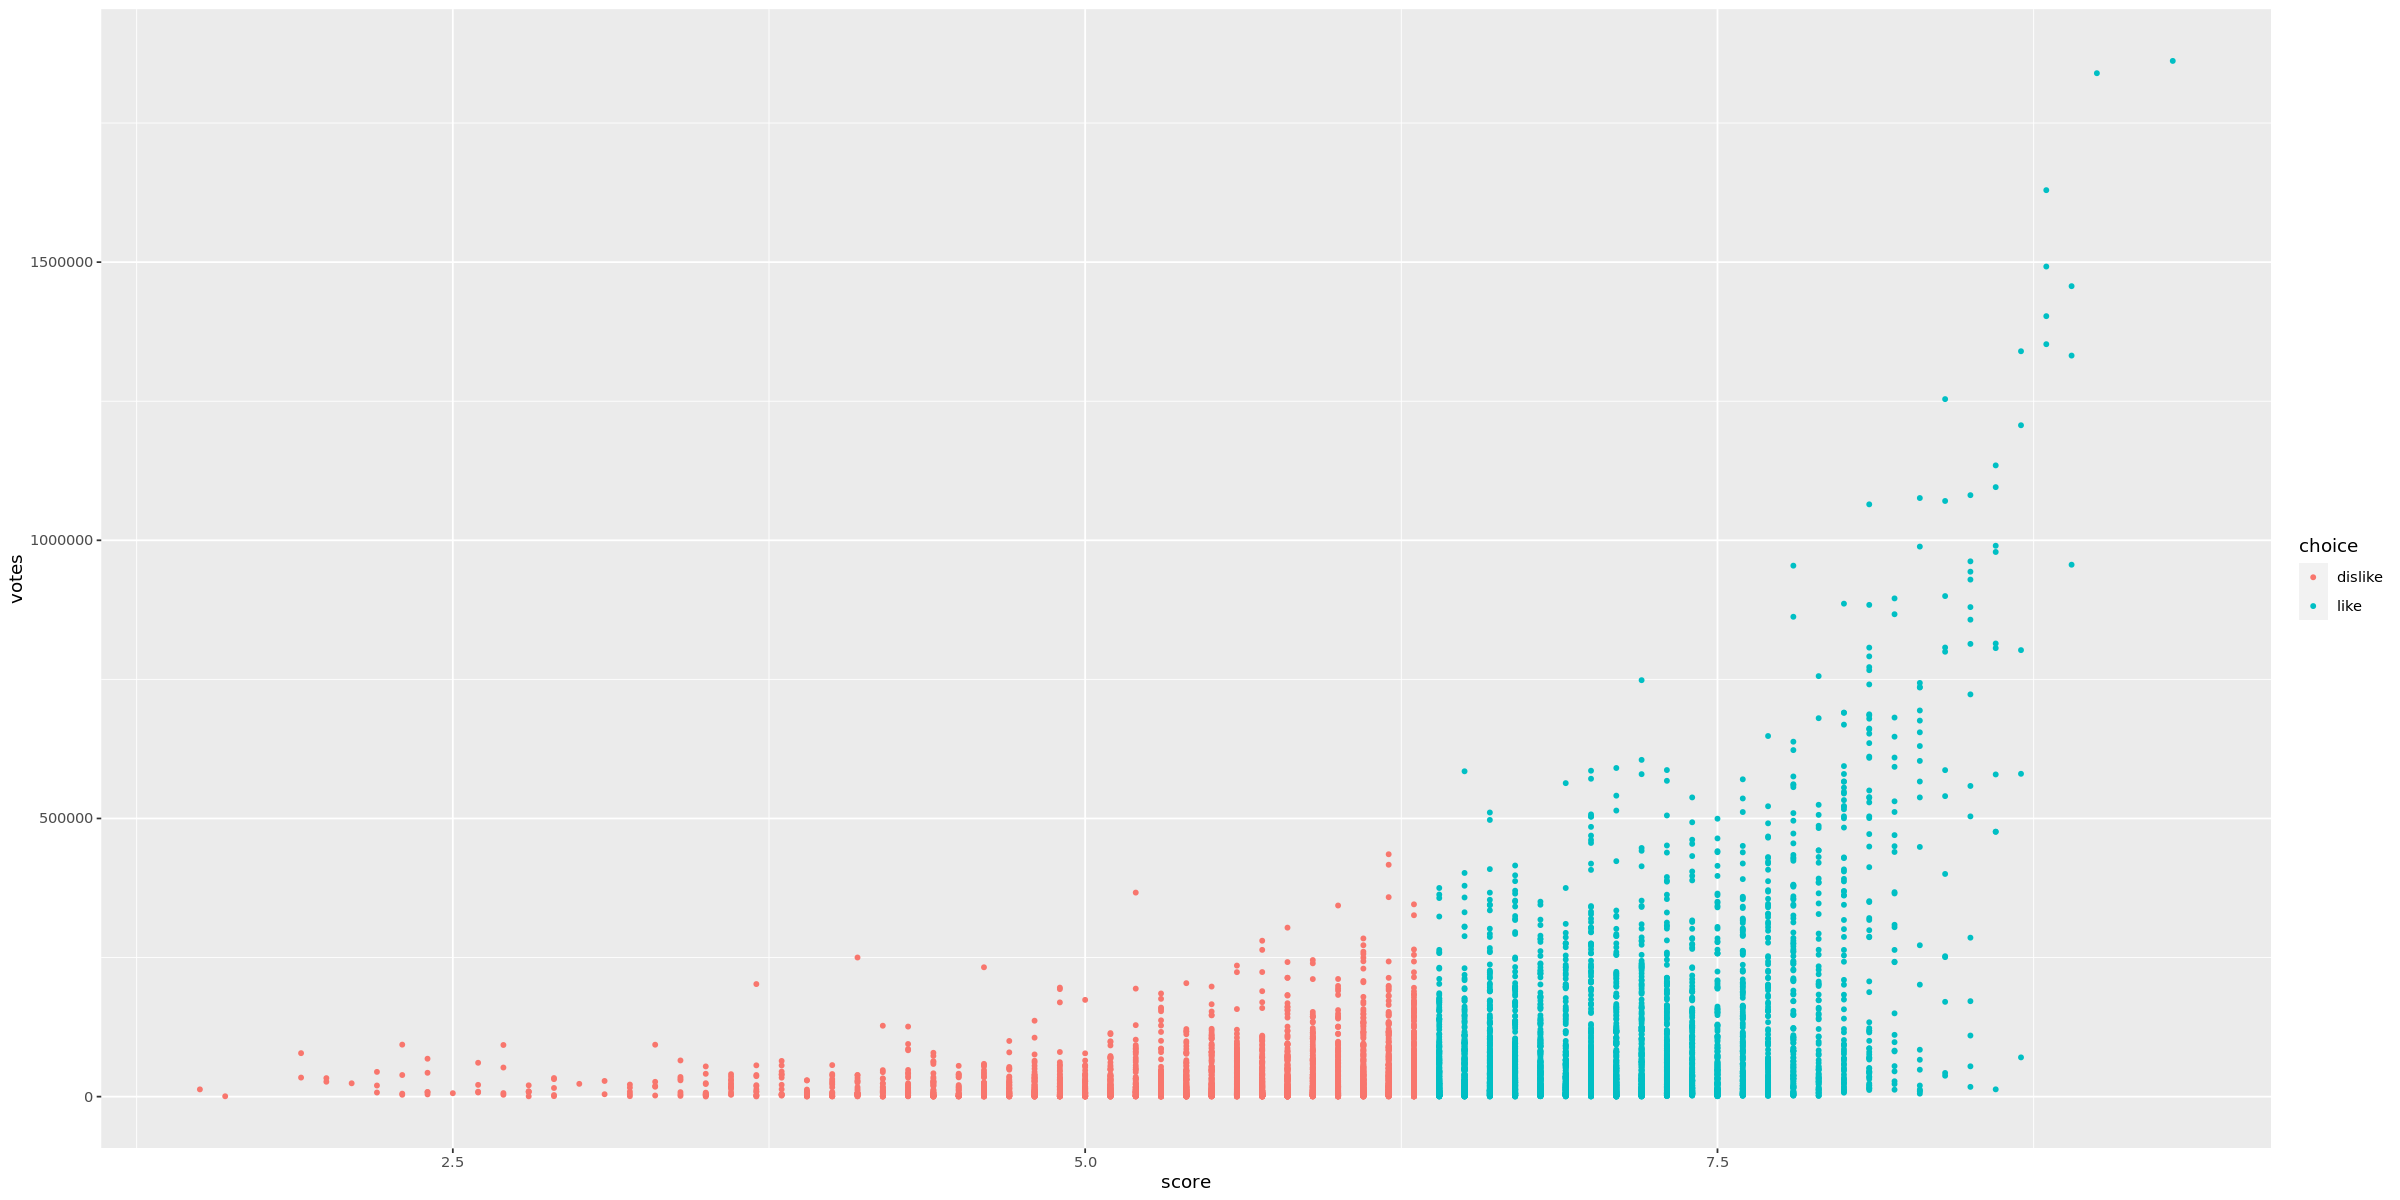

In [58]:
options(repr.plot.width=20, repr.plot.height=10)
gf<-ggplot(movies1)
gf + geom_point(aes(x=score,y=votes,colour=choice),size=1)

Aquí podemos ver la relación que existe entre la calificación vs el número de votos. La definición de la varibale choice se hizo de acuerdo a la media de la calificación, y éste es el claro diferenciador en la partición de los colores. Podemos ver que para las mejor calificadas también se tiene un mayor número de votos y la dispersión de los datos antes de la media es menor. Por lo que si hay una película mal rankeada fue definida así por un menor número de votos.

### Densidad de ganancia bruta

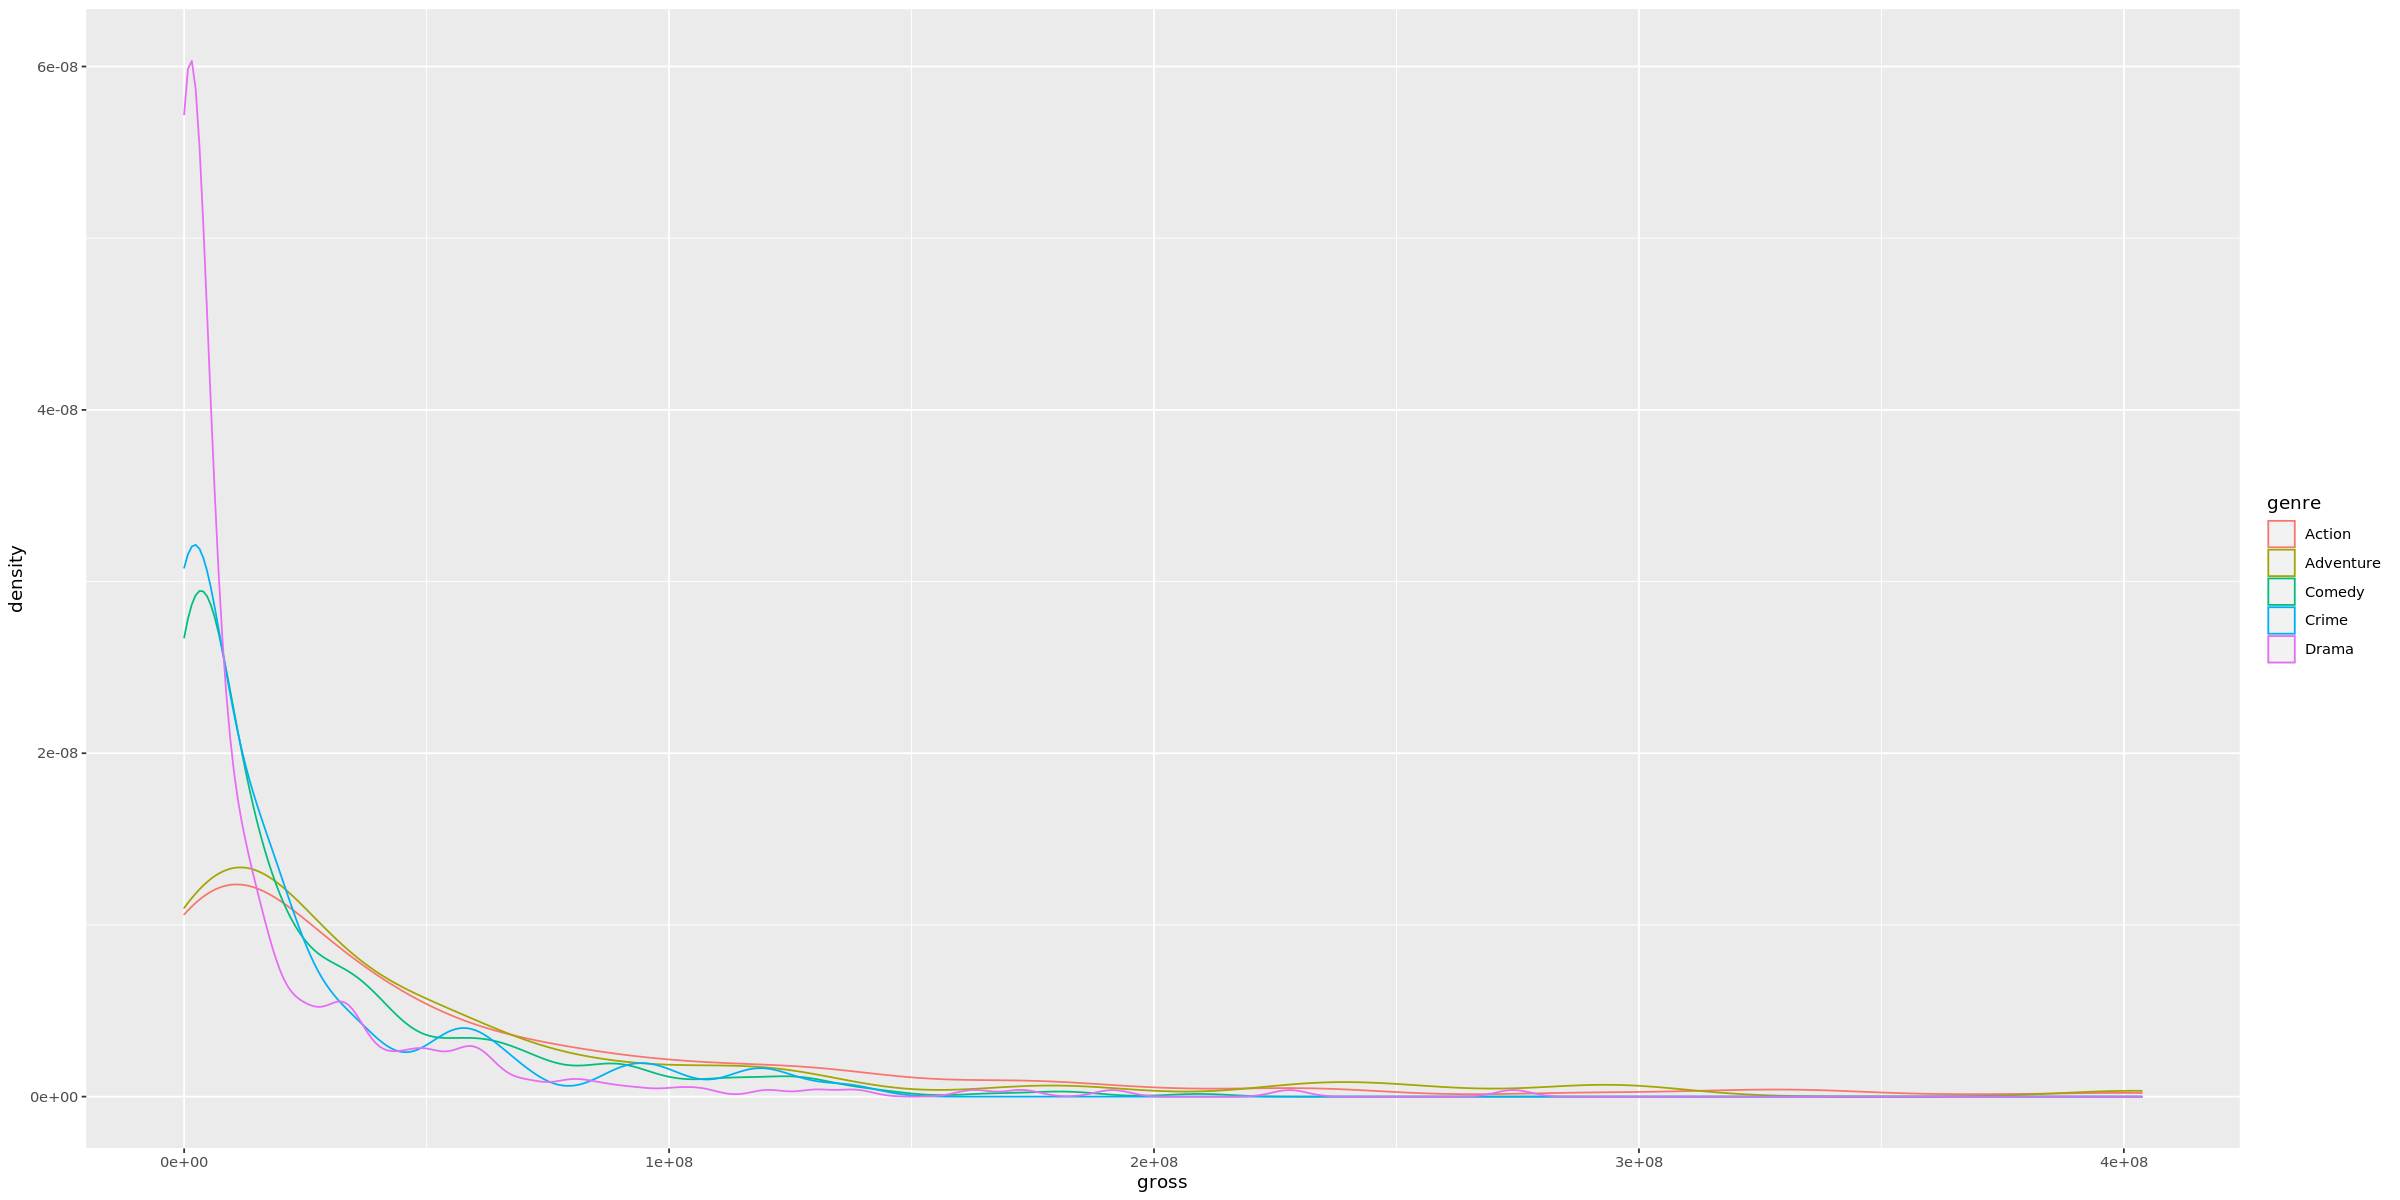

In [59]:
options(repr.plot.width=20, repr.plot.height=10)
index2<-which(genre==c('Comedy','Drama','Action','Crime','Adventure'))
ggplot(movies[index2,]) + geom_density(aes(x = gross, color = genre))

Tomamos los principales géneros para que la gráfica sea más clara y podemos ver que la ganancia bruta tiene un claro sesgo pues la mayoría de las películas no generan ganancias exorbitantes.
Se puede apreciar que las películas de drama son las que tienen un mayor sesgo y por tanto en su mayoría son las que generan una ganancia pequeña y en el lado opuesto se encuentran los géneros de acción y aventura que aunque también se presenta el sesgo tienen una distribución con una curtosis más pequeña.

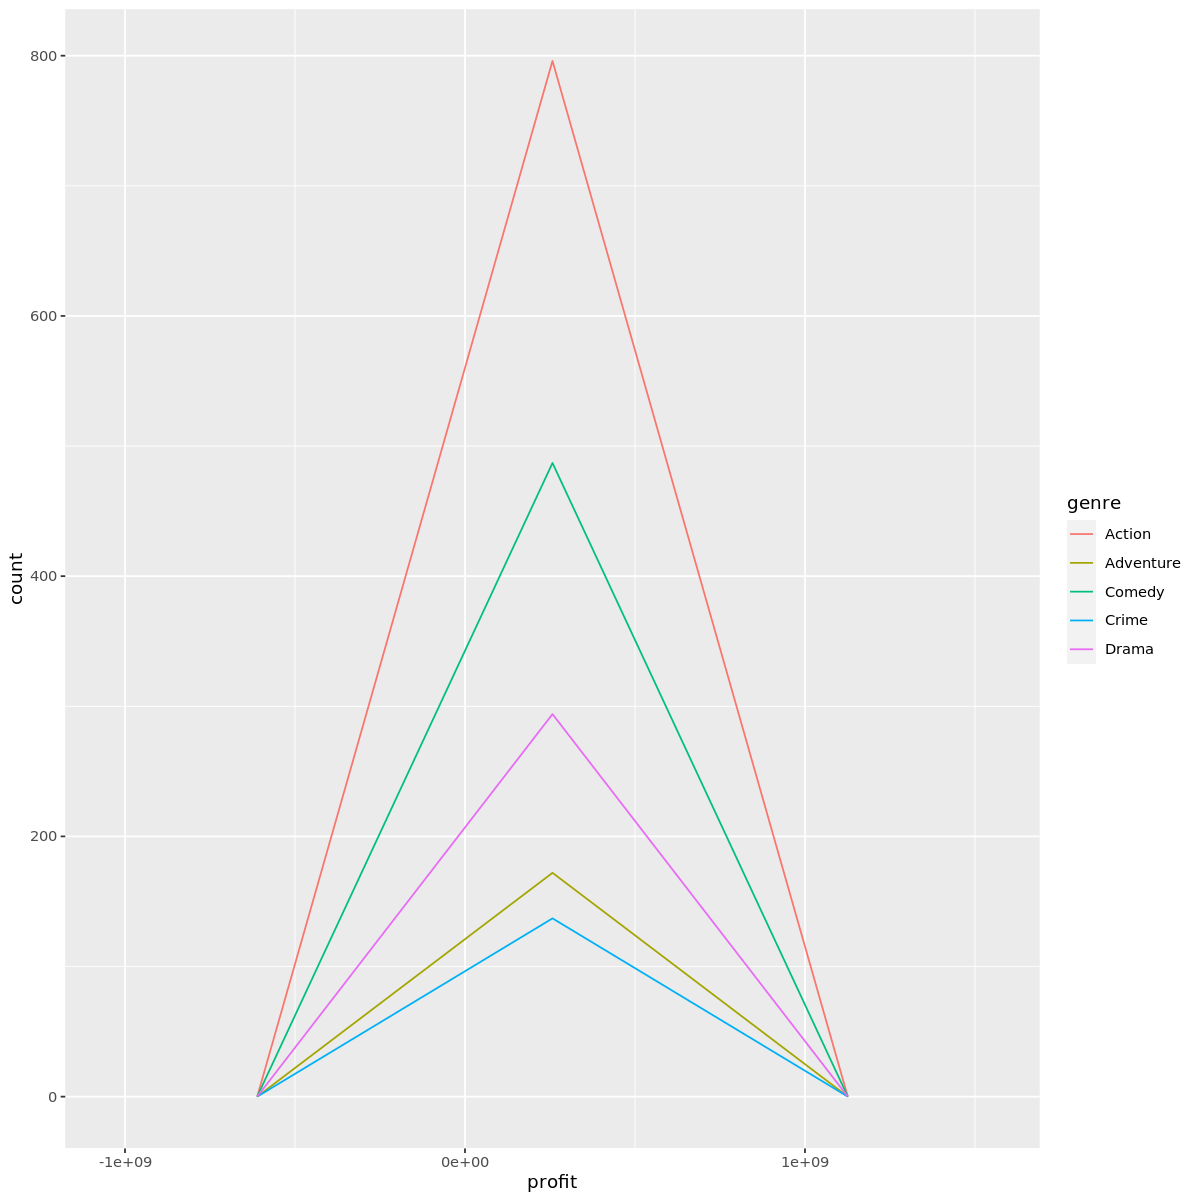

In [68]:
options(repr.plot.width=10, repr.plot.height=10)
index4<-filter(movies1,genre %in% c('Comedy','Drama','Action','Crime','Adventure'),budget>=mean(budget))
ggplot(data=index4, aes(profit,colour=genre)) +
geom_freqpoly(bins=1) 

Con ésta gráfica observamos que las películas de acción lideran las ganancias netas, aunque el género que se produce más es comedia se encuentra en segundo lugar de ganancias. Y podemos ver que las de crimen fueron las que menos obtuvieron y pensaríamos que no va de acuerdo a las funciones que vimos en la gráfica anterior pero hay que tomar en cuenta que para ésta gráfica se tomaron solamente las películas con un presupuesto mayor a la media y además estamos tomando la variable profit que puede incluir números negativos si el monto invertido o budget fue mayor a las ganancias brutas(gross).

### (TOP 50 SCORE) Relacion de presupuesto, score y votos de las  50 peliculas con mejor score: 

Las variables son escaladas entre 0 y 1 para poder compararlas en los 3 gráficos siguientes. 

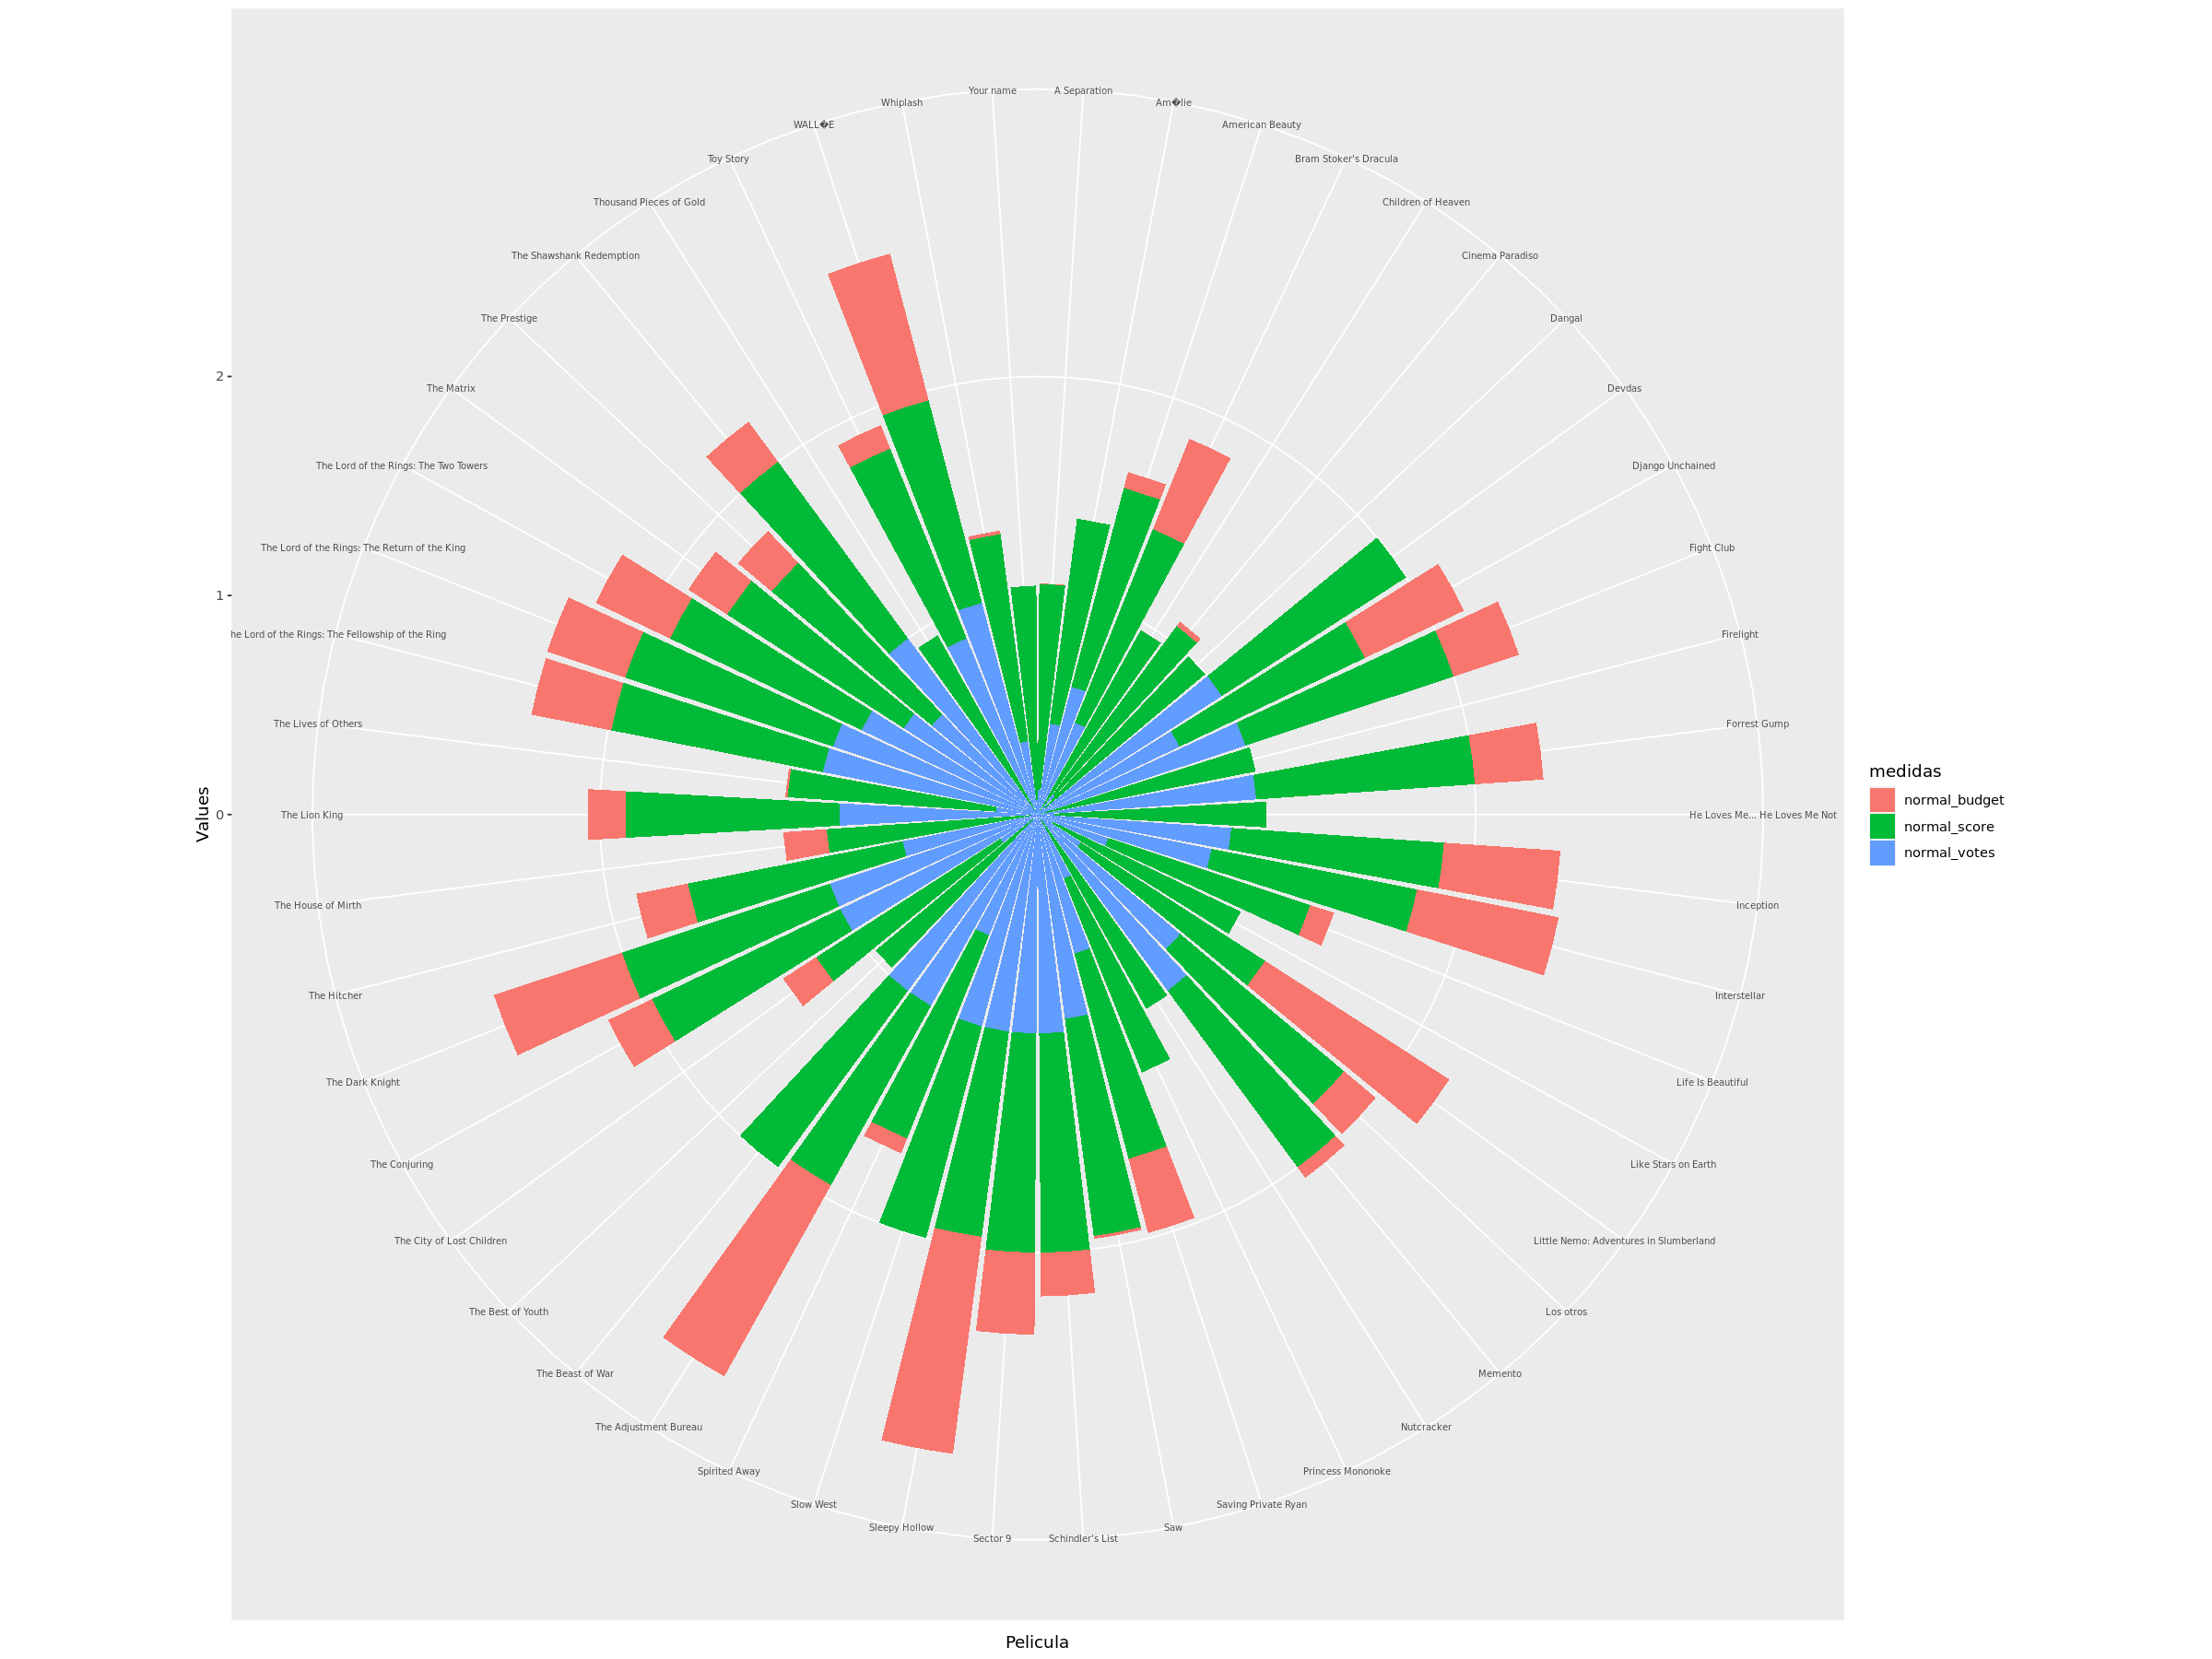

In [45]:
# Las primas 50 con mejor score
options(repr.plot.width=20, repr.plot.height=15)

movies %>% 
    group_by(genre) %>%  
    mutate(normal_score= normalit(score),
        normal_budget= normalit(budget),
        normal_votes= normalit(votes))  %>% 
    as_tibble() %>% select(name, genre, normal_score,normal_budget,normal_votes) %>% 
    arrange( desc(normal_score))   %>% 
    head(50)  %>% # las 100 peliculas con mejor score por genero 
    gather(key = "medidas", value="values", -c(1,2))   %>% 

ggplot() +  
    geom_bar(aes(x=as.factor(name), y=values, fill=medidas), stat="identity") +
    xlab("Pelicula") + 
    ylab("Values") +
    theme(axis.text.x = element_text( size=6 )) +
    coord_polar()   



* Lo que podemos observar en la gráfica anterior es que de las 50 peliculas que tienen mejor score, las que tienen igualmente un alto presupuesto y altos votos son: "Sleepy Hollow", "WALL-E" y "The Adjustment Bureau".


* Es interesante que de las peliculas con mas bajos presupuestos (diferentes de cero o que tienen información) que estan en el top 50 de score son: "Whiplash", "Children of Heaven", "A Separation", "The Lives of Others", "Saw", y  "Cinema Paradiso"


* Son pocas las peliculas del top 50 de Score que tienen pocos votos, entre ellas: "Firelight", "Firelight", "Nutcracker" y "Children of Heaven"



### (TOP 50 PRESUPUESTO) Relacion de presupuesto, score y votos de las  50 peliculas con mejor presupuesto: 

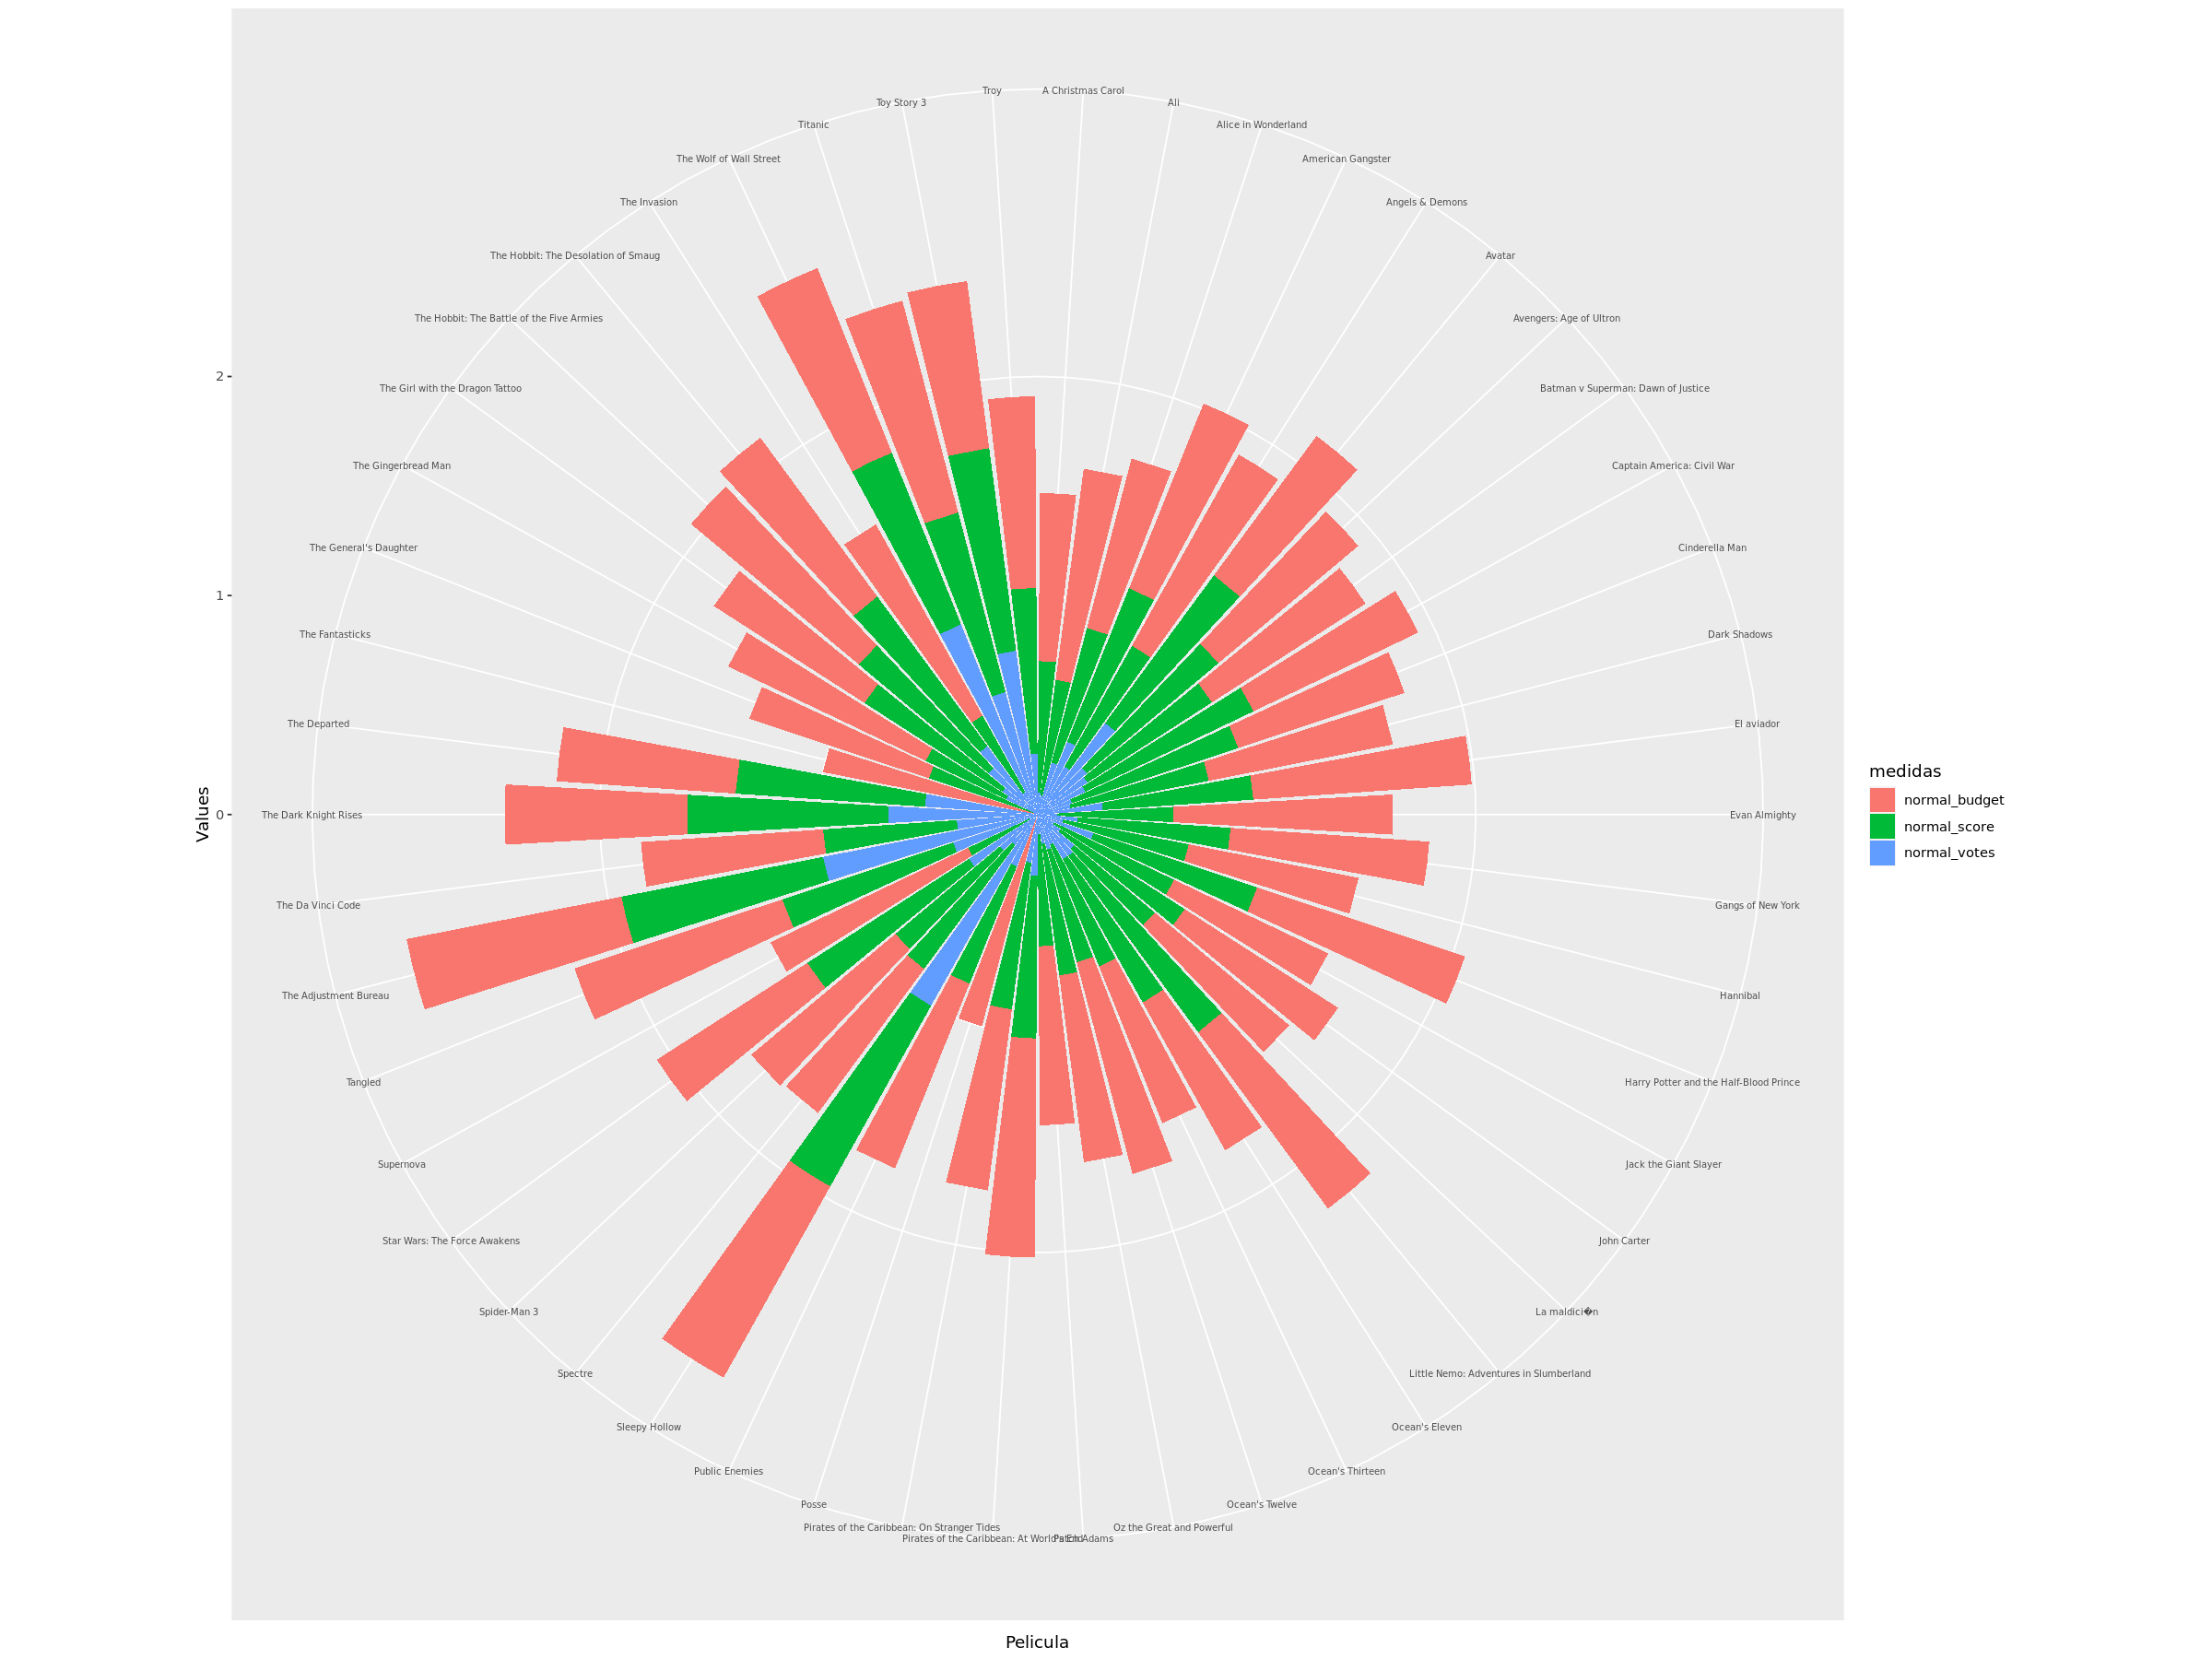

In [46]:
# Las primas 50 con mejor presupuesto

movies %>% 
    group_by(genre) %>%  
    mutate(normal_score= normalit(score),
        normal_budget= normalit(budget),
        normal_votes= normalit(votes))  %>% 
    as_tibble() %>% select(name, genre, normal_score,normal_budget,normal_votes) %>% 
    arrange( desc(normal_budget))   %>% 
    head(50)  %>% # las 100 peliculas con mejor score por genero 
    gather(key = "medidas", value="values", -c(1,2))   %>% 

ggplot() +  
    geom_bar(aes(x=as.factor(name), y=values, fill=medidas), stat="identity") +
    xlab("Pelicula") + 
    ylab("Values") +
     theme(axis.text.x = element_text( size=6 ))+
     coord_polar()   


* El top 50 de peliculas con mayor presupuesto tiene una relación positiva en general con el score, ya que se miran balanceadas las caterogorias, por otro lado no es de la misma manera con lo votos. 
Las peliculas que pese a su presupuesto y score tienen poca proporción de votos en relacion a su género son: "The General's Daughter", "Supernova","Jack the Giant Slayer" y  "Posse"

### (TOP 50 VOTOS) Relacion de presupuesto, score y votos de las  50 peliculas con más votos: 

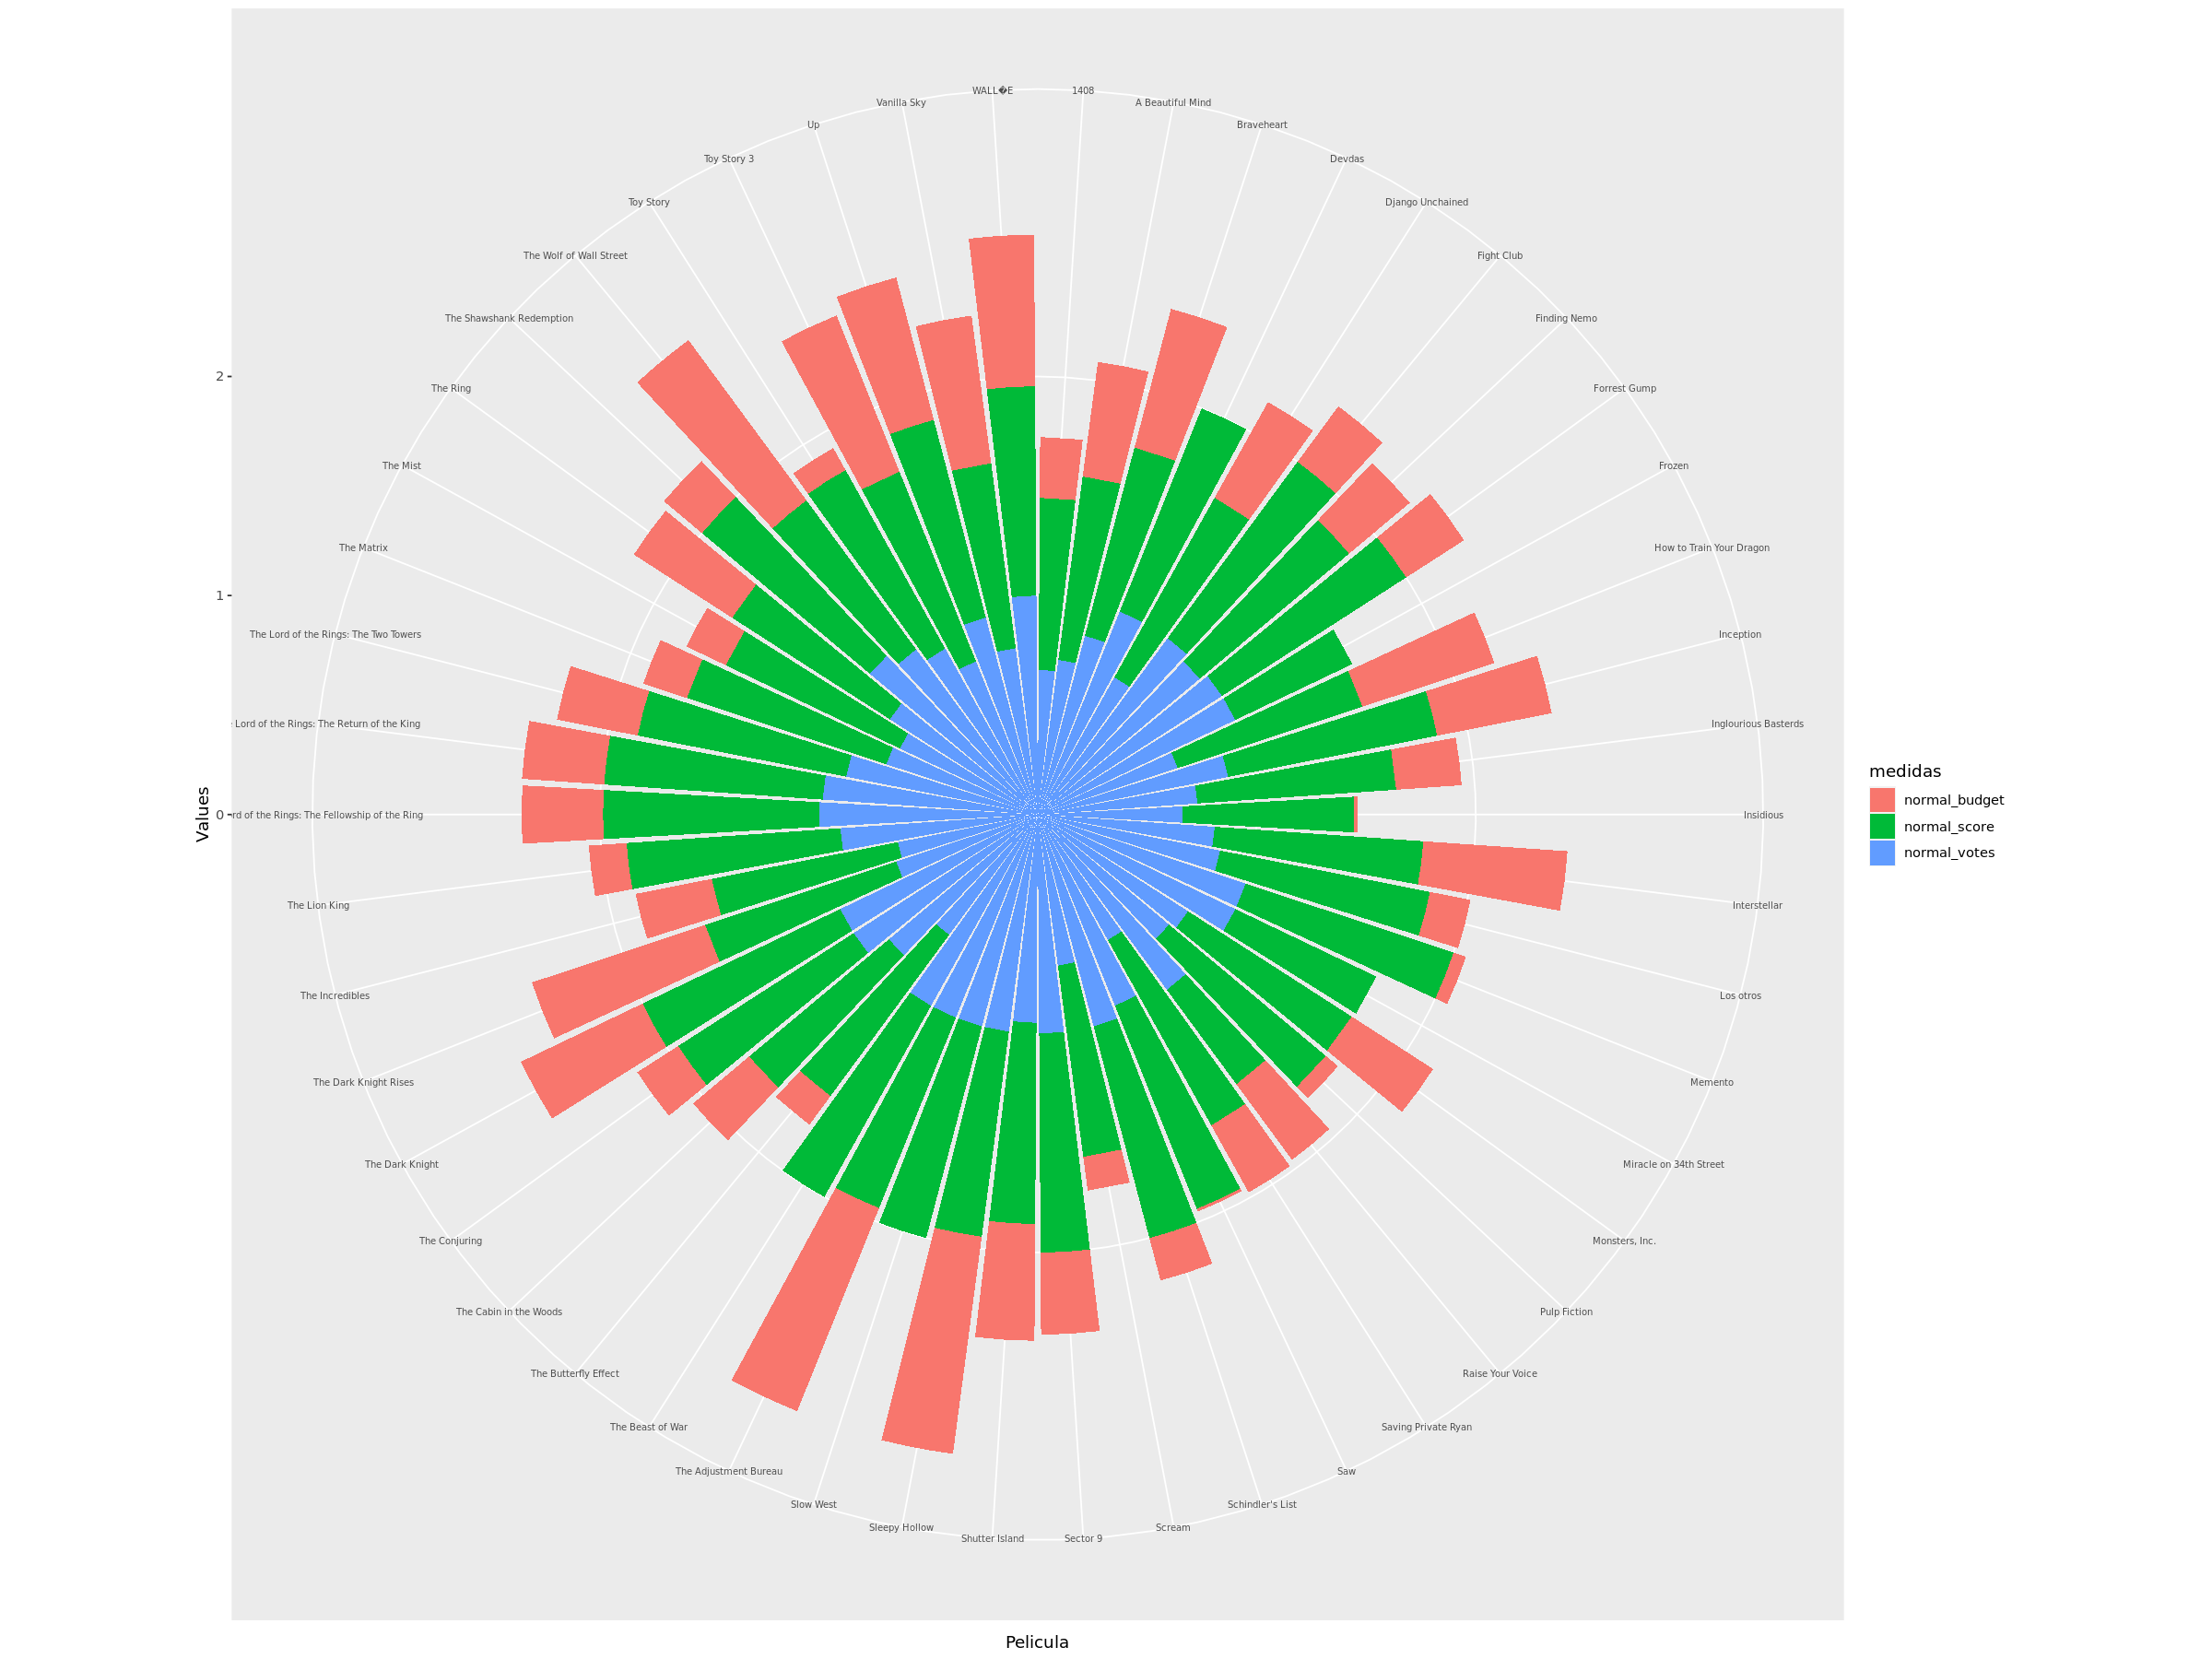

In [48]:
movies %>% 
    group_by(genre) %>%  
    mutate(normal_score= normalit(score),
        normal_budget= normalit(budget),
        normal_votes= normalit(votes))  %>% 
    as_tibble() %>% select(name, genre, normal_score,normal_budget,normal_votes) %>% 
    arrange( desc(normal_votes))   %>% 
    head(50)  %>% # las 100 peliculas con mejor score por genero 
    gather(key = "medidas", value="values", -c(1,2))   %>% 

ggplot() +  
    geom_bar(aes(x=as.factor(name), y=values, fill=medidas), stat="identity") +
    xlab("Pelicula") + 
    ylab("Values") +
    theme(axis.text.x = element_text( size=6 ))+
    coord_polar()  

* De las pelicuas del top 50 de votos, en general tienen un score alto, sin embargo es de notarse las peliculas que con estas catacteristicas tuvieron un bajo presupuesto respecto a su genero, entre ellas se encuentran las ya mencionadas anteriormente: "Saw", "Insidious", "Pulp Fiction" y "Toy Story"



### ¿Cómo es la relación entre la duración y la calificación de las peliculas? ¿Tendrá alguna relación con el género o el país?

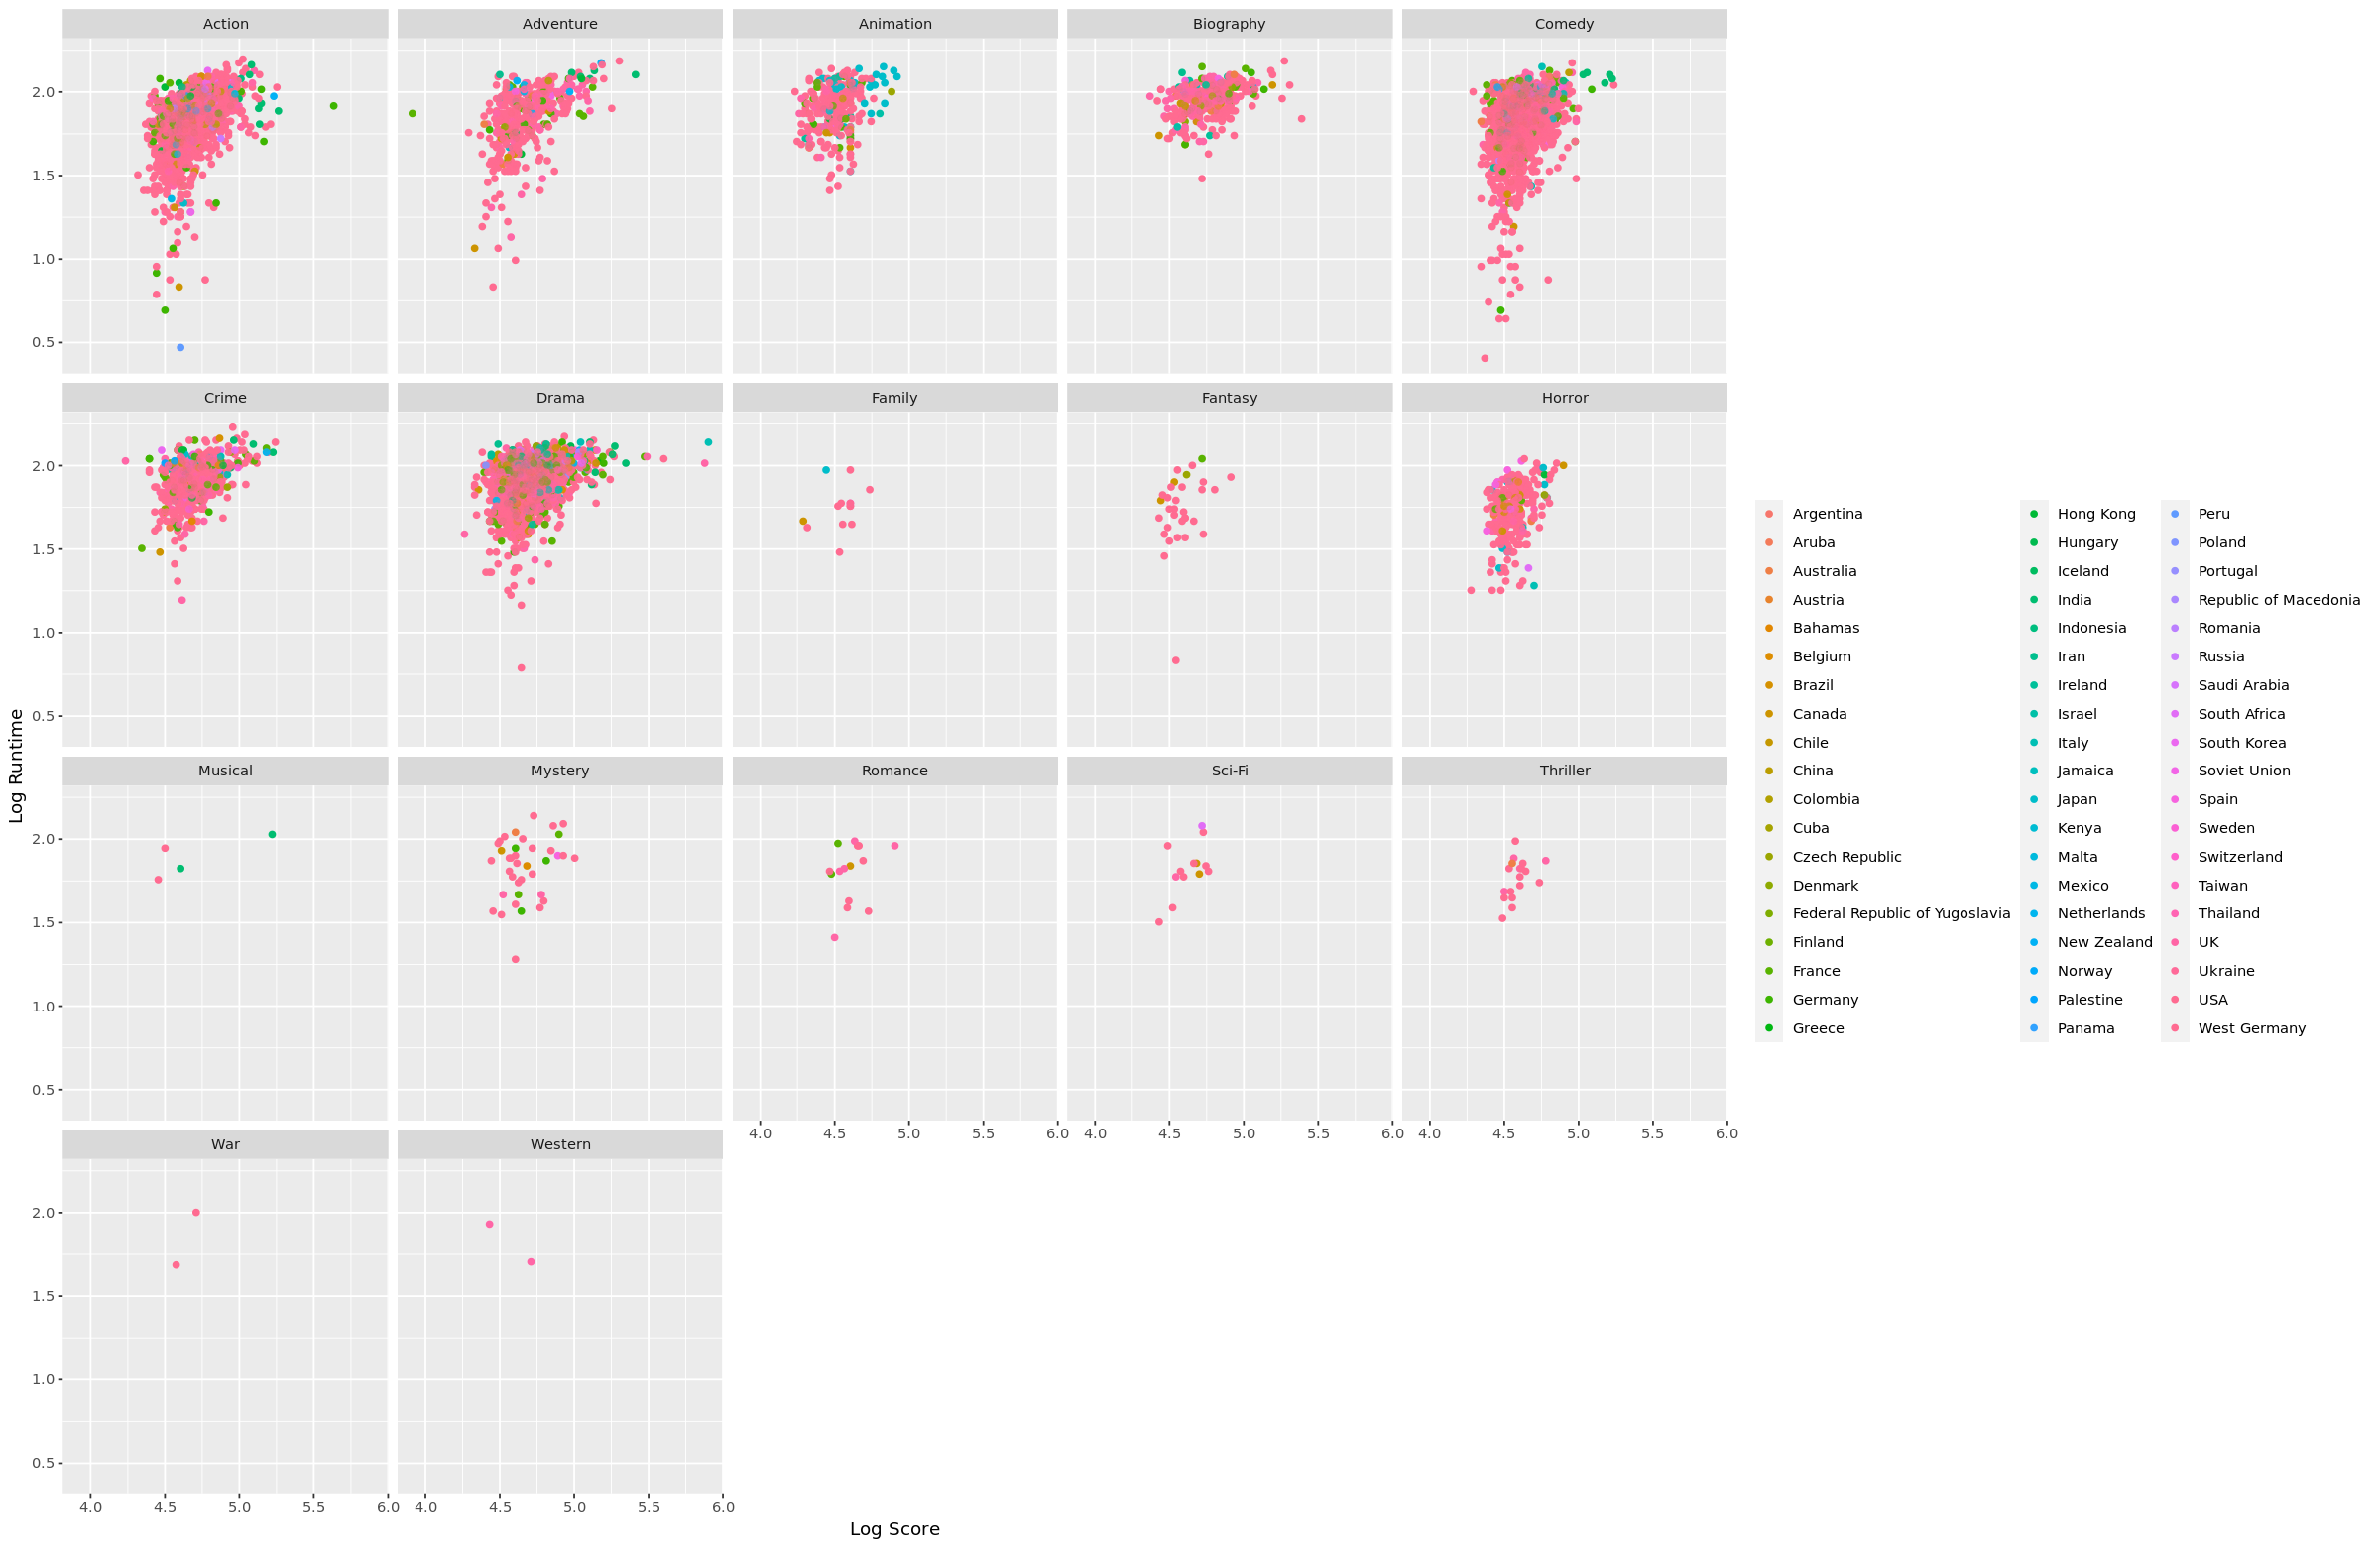

In [66]:
options(repr.plot.width=20, repr.plot.height=13)

movies %>% 
  ggplot(aes(log(runtime),log(score), color=as.factor(country ) ))  +
        geom_point() +
        geom_jitter(width=0.005,alpha=0.05)+facet_wrap(~genre,nrow=4) +
        theme(legend.title = element_blank())+
        xlab("Log Score") + 
        ylab("Log Runtime")
        


Se puede observar tendencias positivas en general sin embargo hay poca varianza. 

### ¿Cómo es la relación entre los votos y la calificación por género?

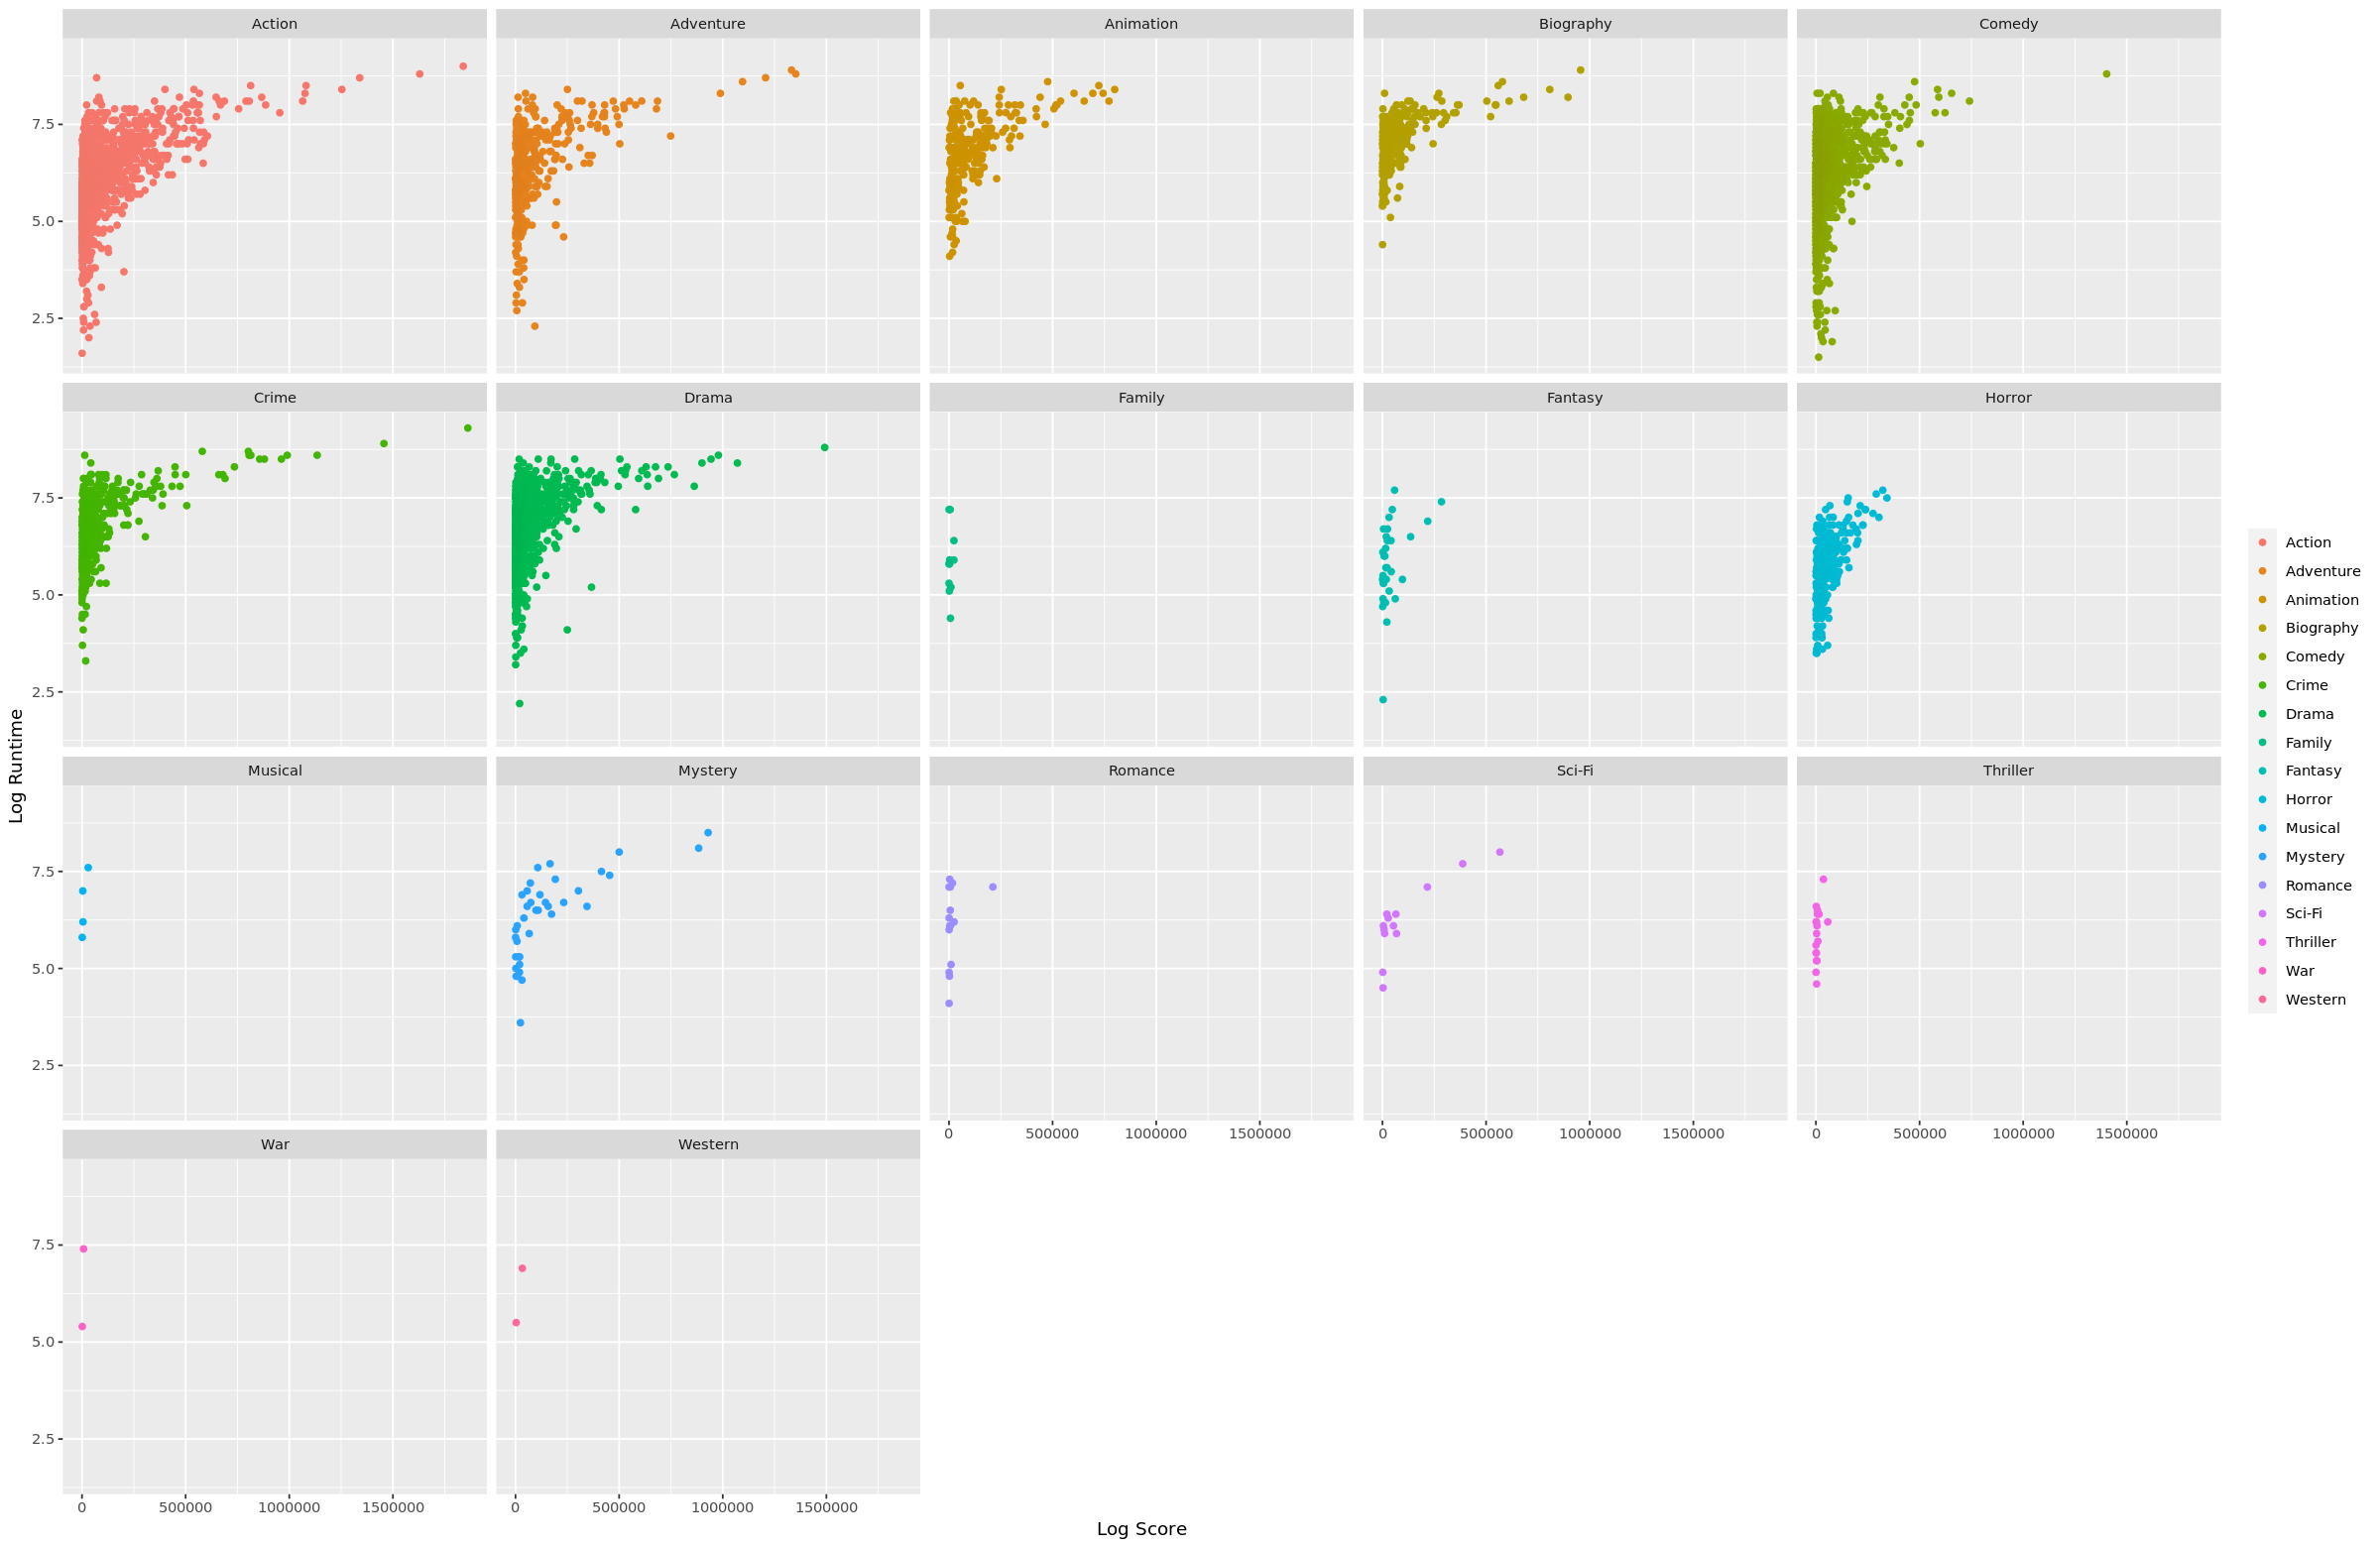

In [67]:
movies %>% 
  ggplot(aes((votes),(score) , color=as.factor(genre)))  +
        geom_point() +
        geom_jitter(width=0.005,alpha=0.05)+facet_wrap(~genre,nrow=4) +
        theme(legend.title = element_blank())+
        xlab("Log Score") + 
        ylab("Log Runtime")

## Análisis de correlación

"En probabilidad y estadística, la correlación indica la fuerza y la dirección de una relación lineal y proporcionalidad entre dos variables estadísticas. Se considera que dos variables cuantitativas están correlacionadas cuando los valores de una de ellas varían sistemáticamente con respecto a los valores homónimos de la otra: si tenemos dos variables (A y B) existe correlación entre ellas si al disminuir los valores de A lo hacen también los de B y viceversa. La correlación entre dos variables no implica, por sí misma, ninguna relación de causalidad"

[Correlación-Wikipedia](https://es.wikipedia.org/wiki/Correlaci%C3%B3n)

Decidimos utilizar este tipo de análisis en nuestros datos porque nuestras variables pueden arrojar información relevante si es que hubiera alguna relación fuerte o importante entre ellas, a continuación veremos lo que arrojan.

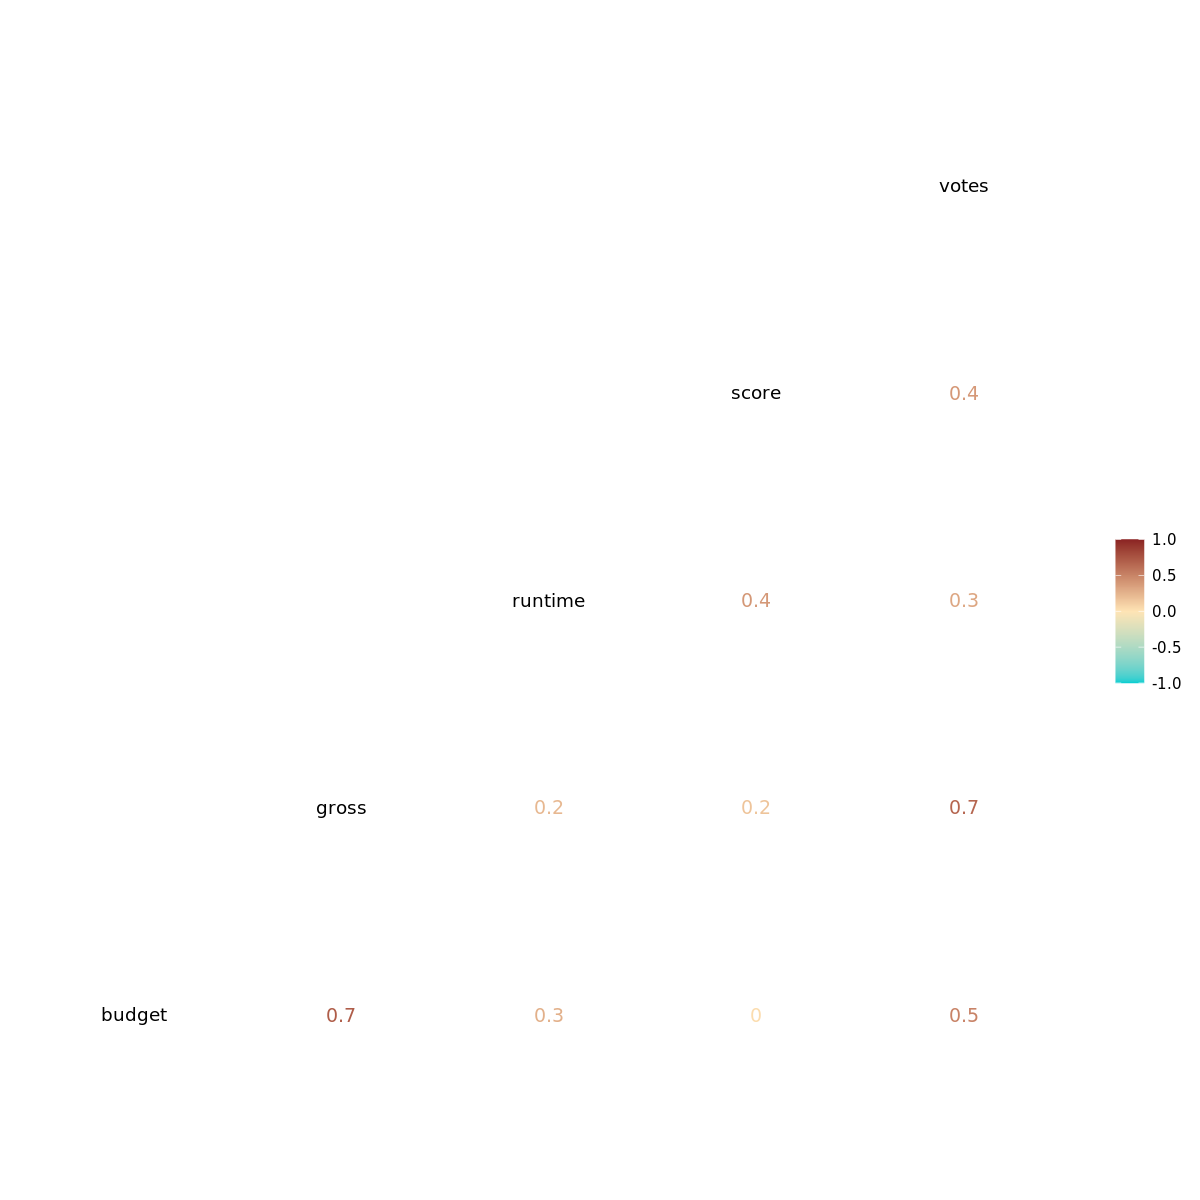

In [76]:
ggcorr(movies,geom = "text",low = "darkturquoise",high = "brown4",mid = "moccasin")


Notemos que las variables con mayor correlación son budget y gross con una correlacion de **.7121**, y las variables gross y votes con una correlación de .6624, es "natural" la correlación alta entre budget y gross pues sería lógico pensar que entre más presupuesto mejores ganancias.

Realizaremos los scatterplot de budget con gross y gross con votes puesto que fueron las variables con correlación más alta:

`geom_smooth()` using formula 'y ~ x'



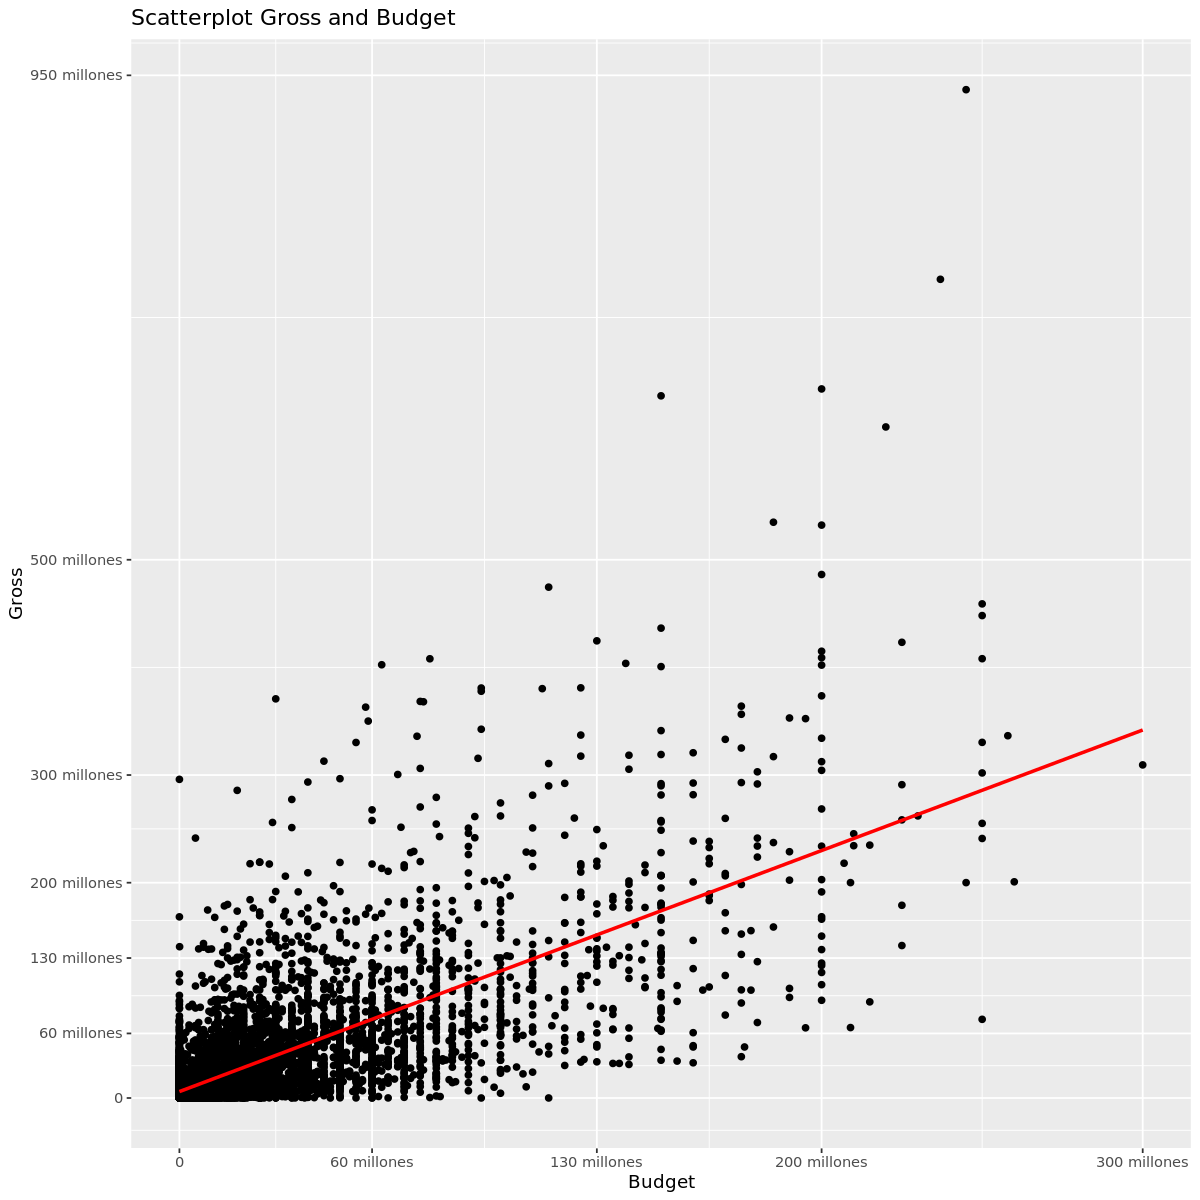

In [77]:
ys<-c("0","60 millones","130 millones","200 millones","300 millones","500 millones","950 millones")
breaksy<-c(0,60000000,130000000,200000000,300000000,500000000,950000000)
ggplot(movies, aes(x=movies$budget, y=movies$gross)) +
  geom_point() +
  geom_smooth(method=lm , color="red", se=FALSE) +
  scale_x_continuous(name= "Budget",labels = ys,breaks = breaksy) +
  scale_y_continuous(name= "Gross",labels = ys,breaks = breaksy) +
  ggtitle("Scatterplot Gross and Budget") 

No es fácil apreciar que exista una relación lineal entre gross y budget.

`geom_smooth()` using formula 'y ~ x'



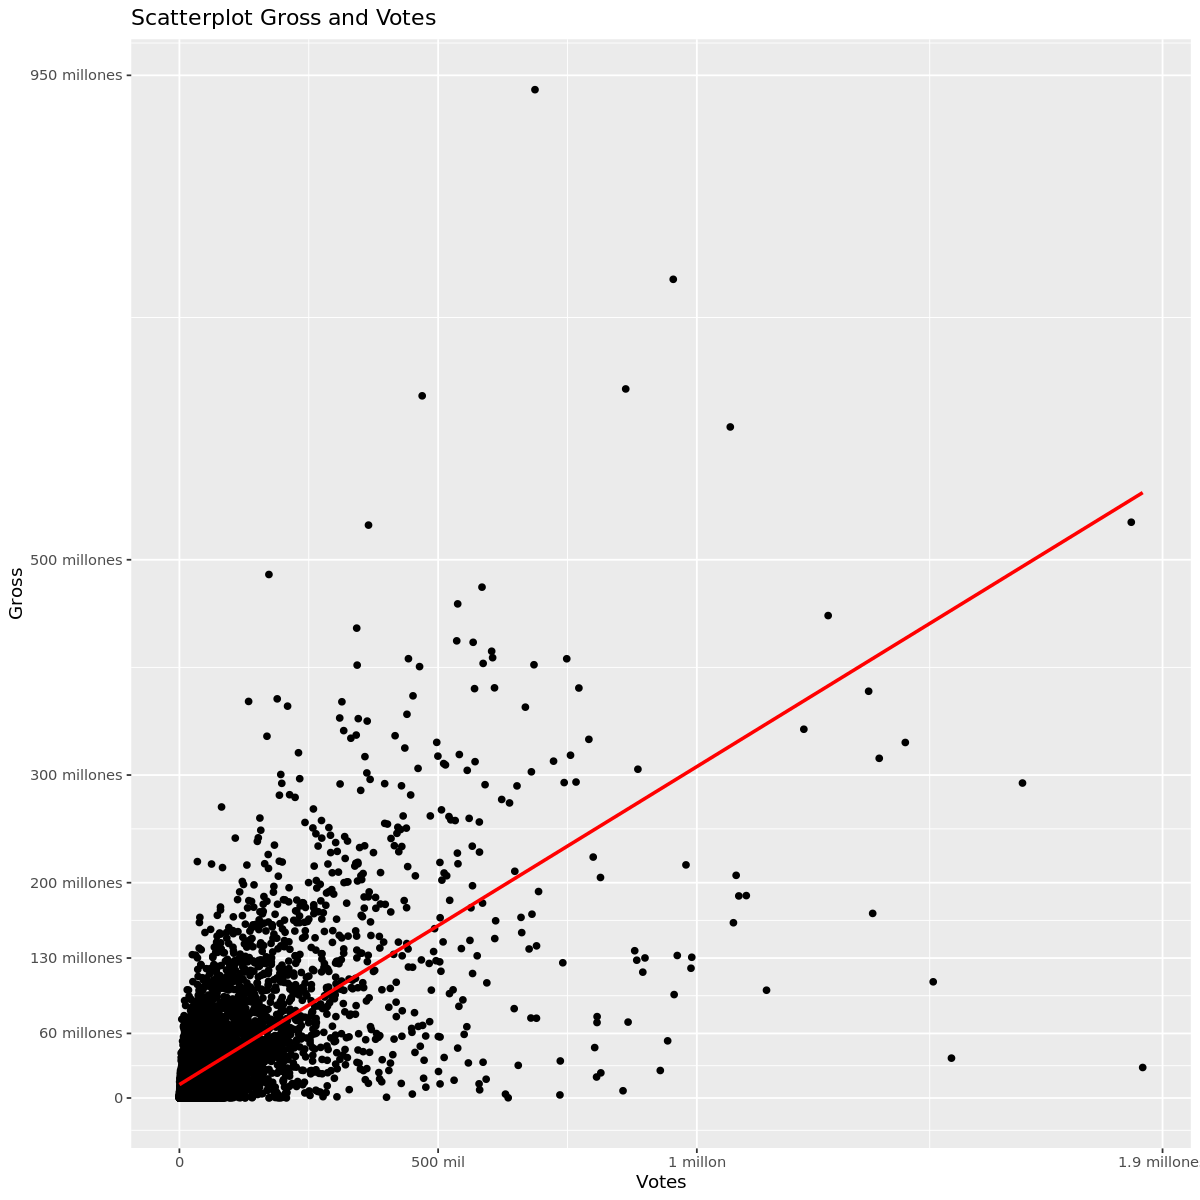

In [78]:
xs<-c("0","500 mil","1 millon","1.9 millones")
breaksx<-c(0,500000,1000000,1900000)
ggplot(movies, aes(x=movies$votes, y=movies$gross)) +
  geom_point() +
  geom_smooth(method=lm , color="red", se=FALSE) +
  scale_x_continuous(name= "Votes",labels = xs,breaks = breaksx) +
  scale_y_continuous(name= "Gross",labels = ys,breaks = breaksy) +
  ggtitle("Scatterplot Gross and Votes") 

De igual manera, una relación lineal entre estas dos variables no es tan evidente.

Podemos hacer una transformación de las variables con la función logaritmo y visualizar la gráfica anterior con ésta nueva transformación. A diferencia de la gráfica de gross vs budget, ya que el mínimo de budget era cero y no podemos realizar esta transformación.

`geom_smooth()` using formula 'y ~ x'



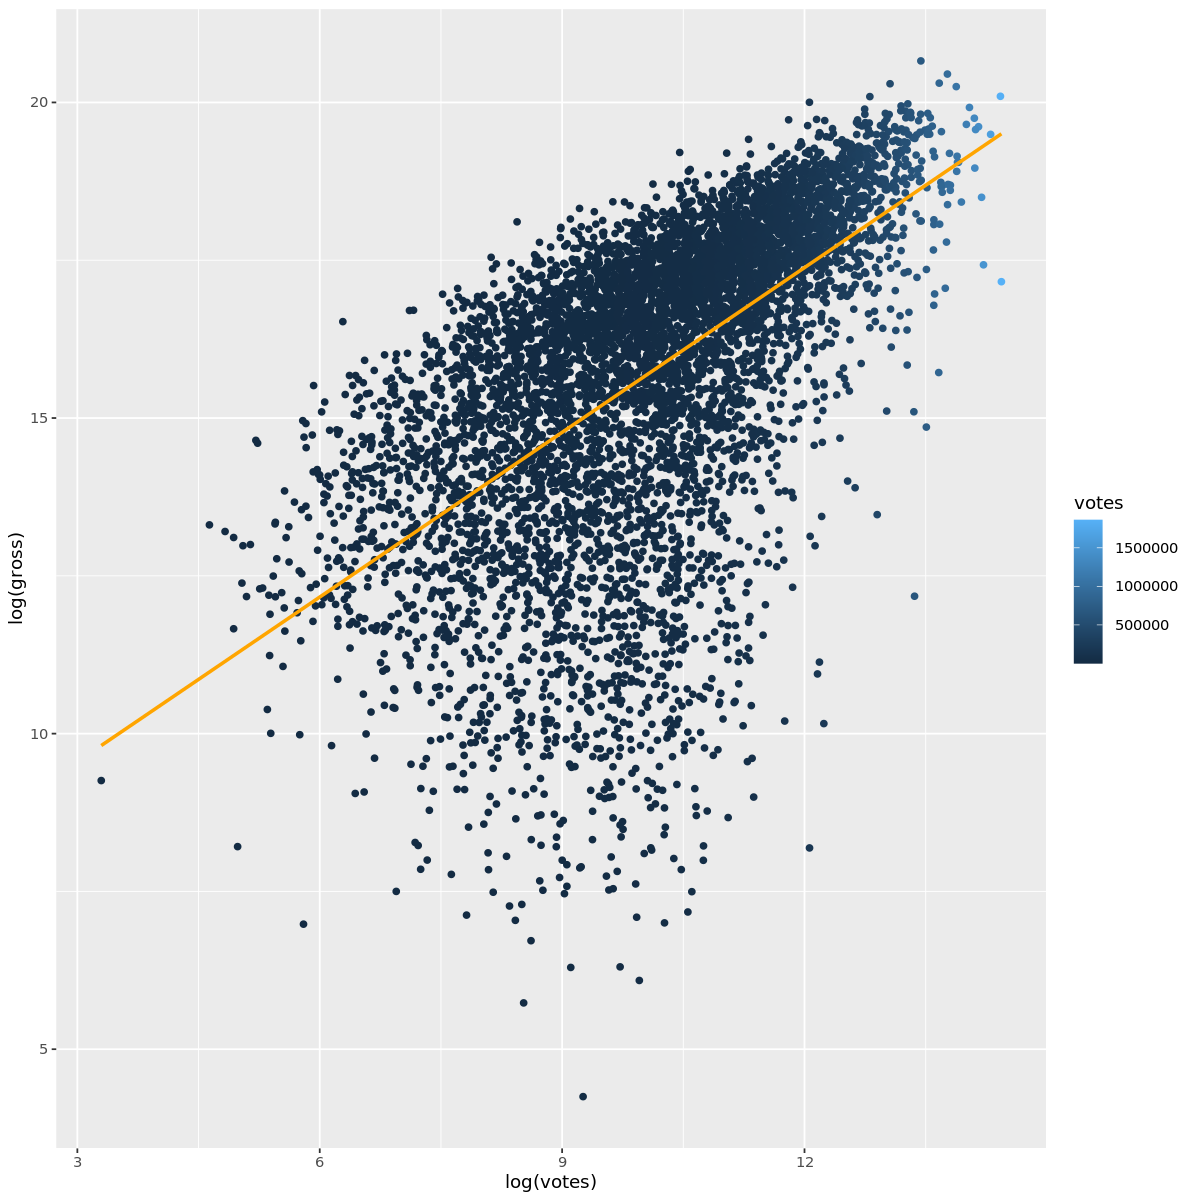

In [79]:
ggplot(data=movies,aes(log(votes),log(gross),col=votes))+
    geom_point()+
    geom_smooth(method=lm , color="orange", se=FALSE)

En ésta gráfica la tendencia que siguen los datos se pueden visualizar mejor por el rango que cambia con la transformación, al parecer siguen una línea más clara pero hay una dispersión importante que se observa por debajo de la línea de tendencia. 

### Ganancia neta vs bruta

A continuación hacemos el análisis de una de las variables que definimos y una de nuestra base original. Podríamos pensar que si vemos mucha ganancia bruta es una buena señal pero analicemos qué pasa con la ganacia neta.

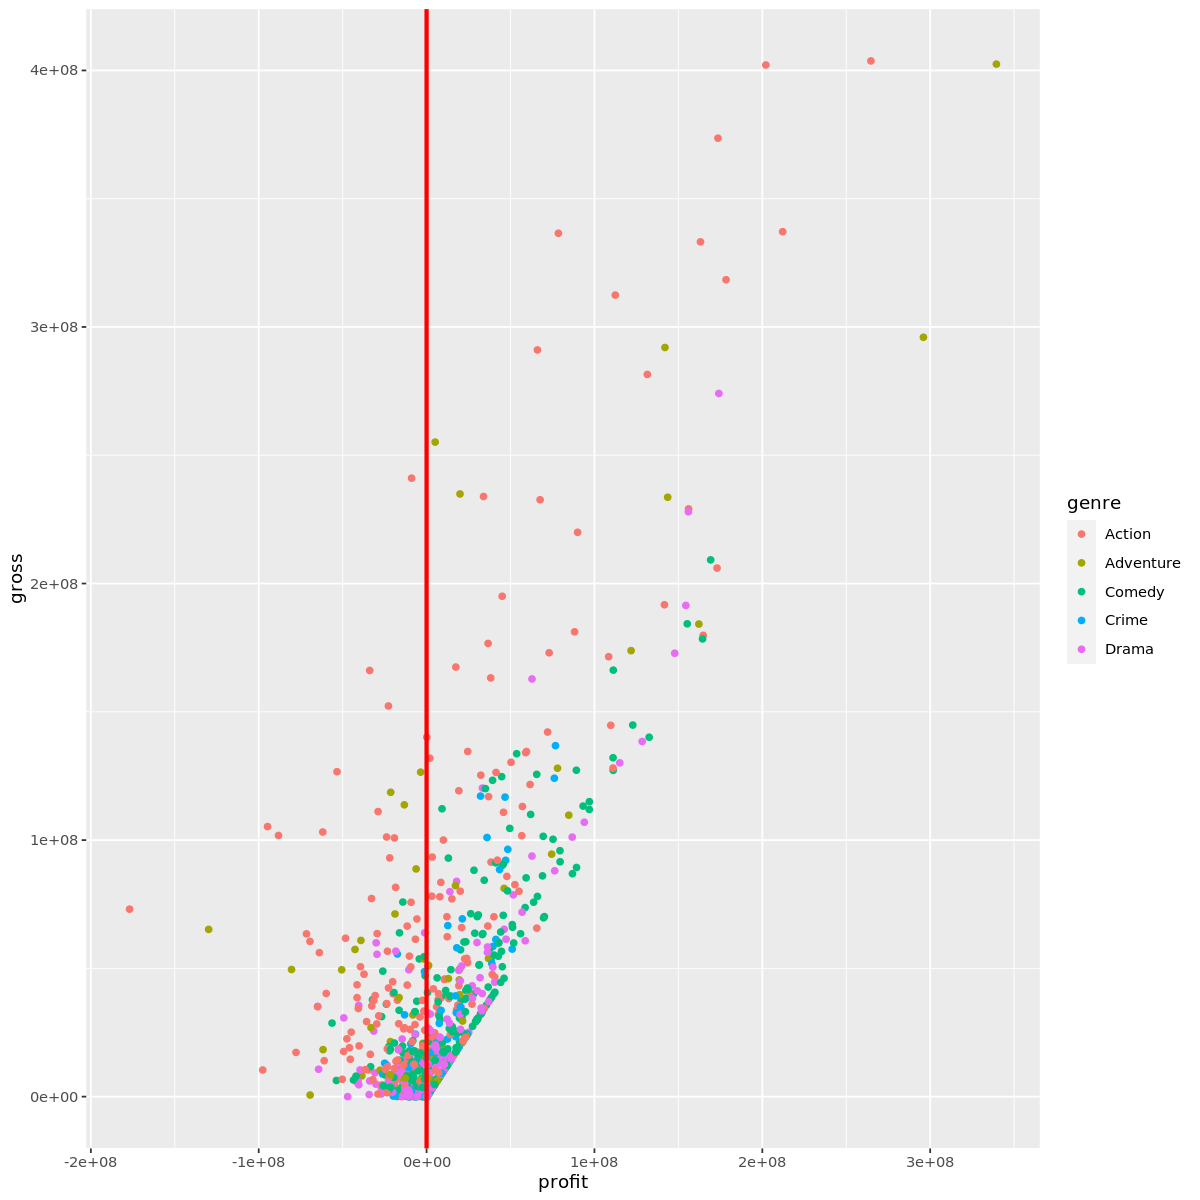

In [80]:
ggplot(data=movies1[index2,],aes(profit,gross,col=genre))+
    geom_point()+
     geom_vline(xintercept=0,col='red',size=1.2)

In [81]:
cor(profit,gross)

[1] 0.7745993

En la gráfica observamos que efectivamente las dos variables por ser ganancias siguen la misma tendencia y su correlación es muy buena, la mejor de todas las que hemos hecho porque tiene un valor de 0.77. 

Ahora que si hacemos el análsis de si se está obteniendo una ganancia real podemos ver con la línea vertical que muchos de los datos se encuentran del lado izquierdo, lo que nos dice que están en números rojos, es decir, gastaron más de lo que ganaron, pues después de restar el presupuesto no hubo ganancia neta. De igual forma hay muchos datos cercanos a ésta línea aún estando del lado derecho, esto indica que casi no obtuvieron ganancia. 

### ¿Las ganancias netas van de la mano con la calificación?

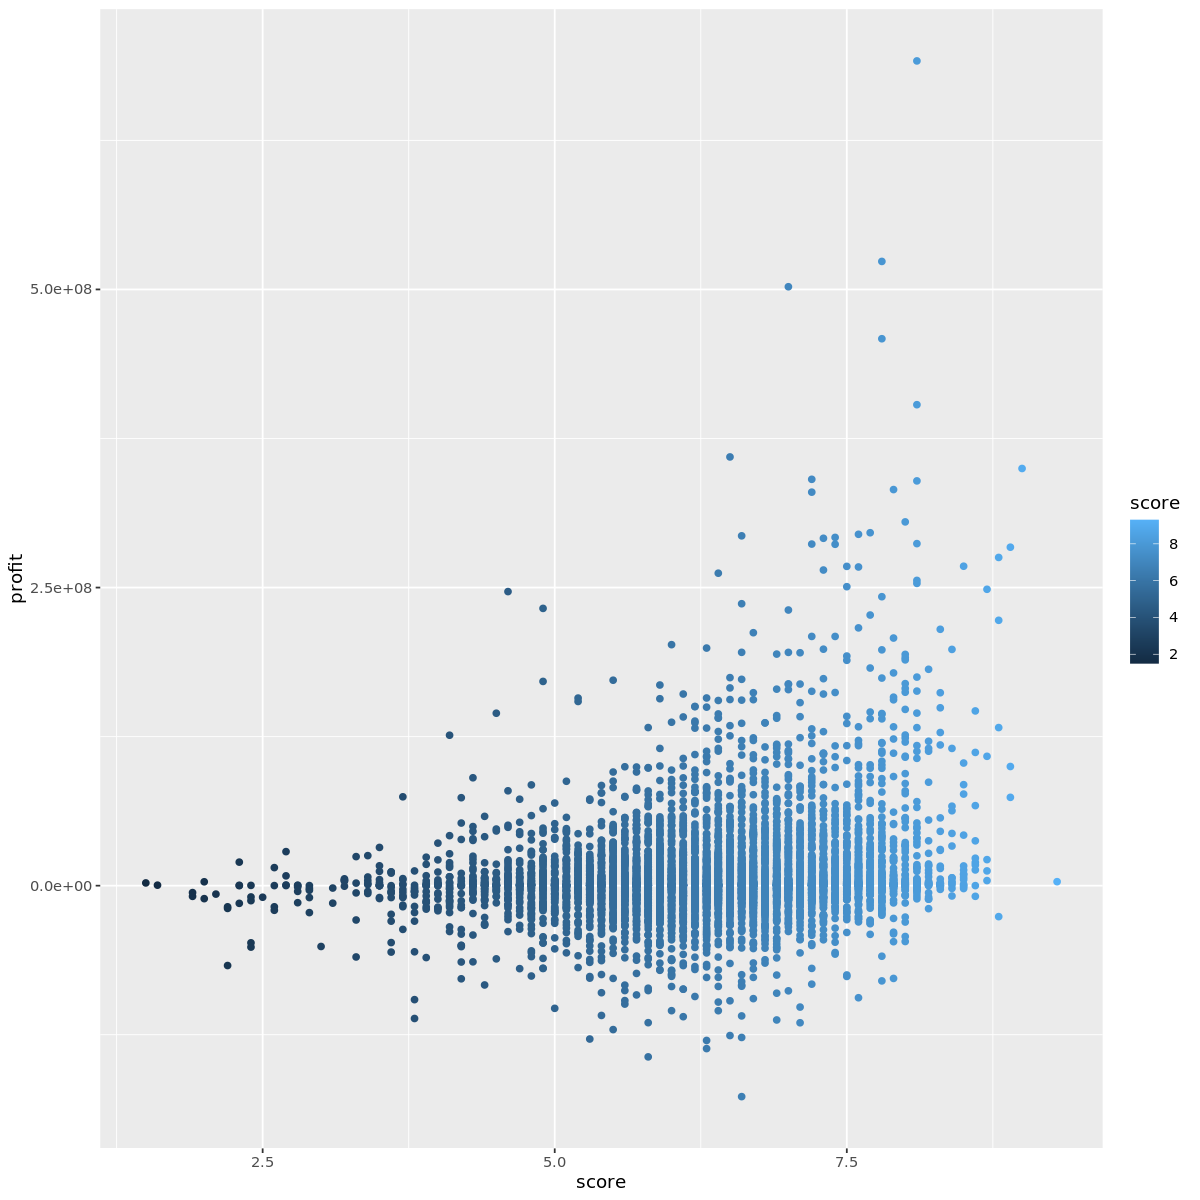

In [82]:
ggplot(data=movies1,aes(x=score,y=profit,col=score))+geom_point()

In [83]:
cor(score,profit)

[1] 0.1966924

Con la gráfica podemos definir que no es así, pues aunque aumente el score o calificación, se mantiene un nivel de ganancias al rededor del mismo nivel y son pocos los casos que generan grandes cantidades de dinero. Un claro ejemplo es el punto con mejor score, él cual sigue la tendencia de generar las mismas ganancias que inclusive la de menor score.

Por lo que los cineastas no deben tomar como una variable significativa el score que les dé la crítica para saber si será rentable; ya que no va en función de sus ganancias la calificación que obtiene la película. Ésto lo podemos confirmar con el análisis de correlación entre ambas variables, pues es muy cercano a cero y nos confirma que no implica que a mayor score mayor ganancia.

## Regresión lineal

Dada la información anterior intentaremos ajustar una regresión lineal con gross como la variable explicada y las variables budget, country, genre, rating, runtime, score, votes y year. Ajustaremos el modelo hasta que todas las variables del modelo sean significativas.

In [84]:
movies1<-movies[,c(1,3,5,6,8,10,11,13,15)]
movies1$country = relevel(movies1$country, ref = "USA")
movies1$genre = relevel(movies1$genre, ref = "Comedy")
movies1$rating = relevel(movies1$rating, ref = "R")
modelo1 = lm(movies1$gross ~ . , data = movies1) 

Con la función summary notamos que la diferencia entre USA y algunos países no es significativa, procederemos colapsando la variable country.

In [85]:
levels(movies1$country)<-c(levels(movies1$country),"Other")
movies1$country[movies$country=="Australia"]="Other"
movies1$country[movies$country=="Argentina"]="Other"
movies1$country[movies$country=="Aruba"]="Other"
movies1$country[movies$country=="Austria"]="Other"
movies1$country[movies$country=="Bahamas"]="Other"
movies1$country[movies$country=="Belgium"]="Other"
movies1$country[movies$country=="Brazil"]="Other"
movies1$country[movies$country=="Canada"]="Other"
movies1$country[movies$country=="Chile"]="Other"
movies1$country[movies$country=="Colombia"]="Other"
movies1$country[movies$country=="Cuba"]="Other"
movies1$country[movies$country=="Denmark"]="Other"
movies1$country[movies$country=="Federal Republic of Yugoslavia"]="Other"
movies1$country[movies$country=="Finland"]="Other"
movies1$country[movies$country=="Greece"]="Other"
movies1$country[movies$country=="Hong Kong"]="Other"
movies1$country[movies$country=="Hungary"]="Other"
movies1$country[movies$country=="Iceland"]="Other"
movies1$country[movies$country=="India"]="Other"
movies1$country[movies$country=="Indonesia"]="Other"
movies1$country[movies$country=="Iran"]="Other"
movies1$country[movies$country=="Israel"]="Other"
movies1$country[movies$country=="Italy"]="Other"
movies1$country[movies$country=="Jamaica"]="Other"
movies1$country[movies$country=="Kenya"]="Other"
movies1$country[movies$country=="Malta"]="Other"
movies1$country[movies$country=="Mexico"]="Other"
movies1$country[movies$country=="Netherlands"]="Other"
movies1$country[movies$country=="New Zealand"]="Other"
movies1$country[movies$country=="Norway"]="Other"
movies1$country[movies$country=="Palestine"]="Other"
movies1$country[movies$country=="Panama"]="Other"
movies1$country[movies$country=="Peru"]="Other"
movies1$country[movies$country=="Poland"]="Other"
movies1$country[movies$country=="Portugal"]="Other"
movies1$country[movies$country=="Republic of Macedonia"]="Other"
movies1$country[movies$country=="Romania"]="Other"
movies1$country[movies$country=="Russia"]="Other"
movies1$country[movies$country=="Saudi Arabia"]="Other"
movies1$country[movies$country=="South Africa"]="Other"
movies1$country[movies$country=="South Korea"]="Other"
movies1$country[movies$country=="Soviet Union"]="Other"
movies1$country[movies$country=="Sweden"]="Other"
movies1$country[movies$country=="Switzerland"]="Other"
movies1$country[movies$country=="Taiwan"]="Other"
movies1$country[movies$country=="Thailand"]="Other"
movies1$country[movies$country=="Ukraine"]="Other"
movies1$country[movies$country=="West Germany"]="Other"

modelo2 = lm(movies1$gross ~ . , data = movies1) 

Colapsamos de esta manera pues la mayoría de los países tiene muy pocas películas, lo cual hace que la diferencia no sea significativa con USA, entonces dejamos los países que desde un inicio tenian una difrencia significativa y los demás los colapsamos en una sola categoría. Con este cambio en la variable country todos los nuevos niveles tienen una diferencias significativa con USA.

Ahora procederemos colapsando la variable genre para hacer las difernecias significativas, colapsaremos la categoría Action con Adventure, Family con Animation, Thriller con Crime y creamos una nueva categoría Other con Musical, Romance, Sci-fi, War y Western.

In [86]:
levels(movies1$genre)<-c(levels(movies1$genre),"Other")
movies1$genre[movies1$genre=="Adventure"]="Action"
movies1$genre[movies1$genre=="Family"]="Animation"
movies1$genre[movies1$genre=="Thriller"]="Crime"
movies1$genre[movies1$genre=="Musical"]="Other"
movies1$genre[movies1$genre=="Fantasy"]="Other"
movies1$genre[movies1$genre=="Romance"]="Other"
movies1$genre[movies1$genre=="Sci-Fi"]="Other"
movies1$genre[movies1$genre=="War"]="Other"
movies1$genre[movies1$genre=="Western"]="Other"

modelo3 = lm(movies1$gross ~ . , data = movies1) 

Con el summary del modelo3 notamos que a pesar de colapsar 6 géneros en Other, está categoría sigue sin tener una diferencia significativa con Comedy, se conservará esa categoría de cualquier forma.

Procedemos con la variable rating, colapsando las categorías con una diferencia no significativa en la categoría, de modo que se preserve lo mejor posible el significado de cada clasificación.

In [87]:
movies1$rating[movies1$rating=="B"]="PG"
movies1$rating[movies1$rating=="B15"]="PG-13"
movies1$rating[movies1$rating=="TV-MA"]="NC-17"
movies1$rating[movies1$rating=="TV-PG"]="PG"
movies1$rating[movies1$rating=="TV-14"]="PG-13"
movies1$rating[movies1$rating=="NOT RATED"]="Not specified"
movies1$rating[movies1$rating=="UNRATED"]="Not specified"
movies1$rating[movies1$rating=="NC-17"]="R"

modelo4 = lm(movies1$gross ~ . , data = movies1) 

Con el colapse de las categorías de la variable rating, todas las diferencias se hacen significativas.

Con la función summary y drop1 observamos que en el modelo 4 la variable runtime no es significativa, por lo que será eliminada del modelo.

In [88]:
modelo5 = lm(movies1$gross ~ .-runtime , data = movies1) 
summary(modelo5)


Call:
lm(formula = movies1$gross ~ . - runtime, data = movies1)

Residuals:
       Min         1Q     Median         3Q        Max 
-341379206  -12696915   -1507830    8639333  609073026 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -1.428e+06  3.932e+06  -0.363  0.71639    
budget                 7.447e-01  1.535e-02  48.514  < 2e-16 ***
countryChina          -1.490e+07  7.031e+06  -2.120  0.03408 *  
countryCzech Republic -2.083e+07  1.211e+07  -1.720  0.08545 .  
countryFrance         -9.342e+06  2.165e+06  -4.316 1.61e-05 ***
countryGermany        -8.896e+06  3.016e+06  -2.949  0.00320 ** 
countryIreland        -1.065e+07  5.196e+06  -2.050  0.04041 *  
countryJapan          -1.086e+07  4.320e+06  -2.515  0.01192 *  
countrySpain          -1.167e+07  4.616e+06  -2.527  0.01152 *  
countryUK             -7.198e+06  1.416e+06  -5.083 3.81e-07 ***
countryOther          -6.069e+06  1.558e+06  -3.895 9.93e-05 ***
genreAction     

Con el summary notamos que todas las variables son significativas en el modelo, a pesar de que no todas las diferencias en la variable year lo son pero verificaremos la significancia de la varibale con la función anova y drop1, ya que por la naturaleza de la variable y lo que se observa en el summary no es recomendable colapsarla.

In [89]:
anova(modelo5,test="F")

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
budget,1,1.171465e+19,1.171465e+19,10109.108516,0.000000e+00
country,9,1.260195e+17,1.400217e+16,12.083114,3.861676e-19
genre,8,9.810206e+16,1.226276e+16,10.582095,7.055320e-15
rating,4,8.776484e+16,2.194121e+16,18.934074,1.699549e-15
score,1,7.710784e+17,7.710784e+17,665.398872,4.925149e-140
votes,1,2.333001e+18,2.333001e+18,2013.253512,0.000000e+00
year,30,1.256422e+17,4.188075e+15,3.614082,1.053993e-10
Residuals,6765,7.839427e+18,1.158821e+15,NA,NA


In [90]:
drop1(modelo5,test = "F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,7.839427e+18,236614.5,NA,NA
budget,1,2.727375e+18,1.056680e+19,238648.6,2353.576573,0.000000e+00
country,9,7.625166e+16,7.915678e+18,236662.5,7.311228,1.144421e-10
genre,8,1.155226e+17,7.954949e+18,236698.3,12.461213,6.814081e-18
rating,4,1.931577e+17,8.032584e+18,236772.5,41.671151,1.442840e-34
score,1,4.874175e+15,7.844301e+18,236616.8,4.206149,4.031613e-02
votes,1,2.403631e+18,1.024306e+19,238436.4,2074.202959,0.000000e+00
year,30,1.256422e+17,7.965069e+18,236663.0,3.614082,1.053993e-10


En ambos casos todas las variables son significativas para el modelo, por lo cual el modelo5 es el final.

Cabe resaltar que el modelo5 fue considerado como el final pero no significa que sea el mejor modelo puesto que el objetivo era tener un modelo con variables significativas, el modelo tiene una $R^2$ de .66 y faltaría verificar los supuestos de la regresión lineal.